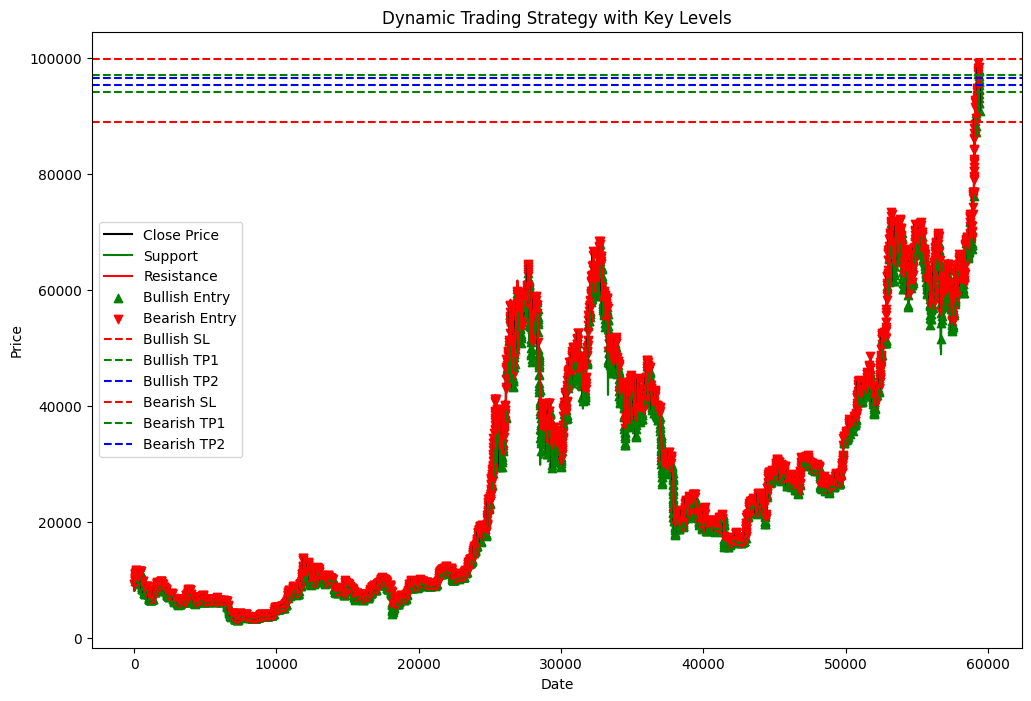

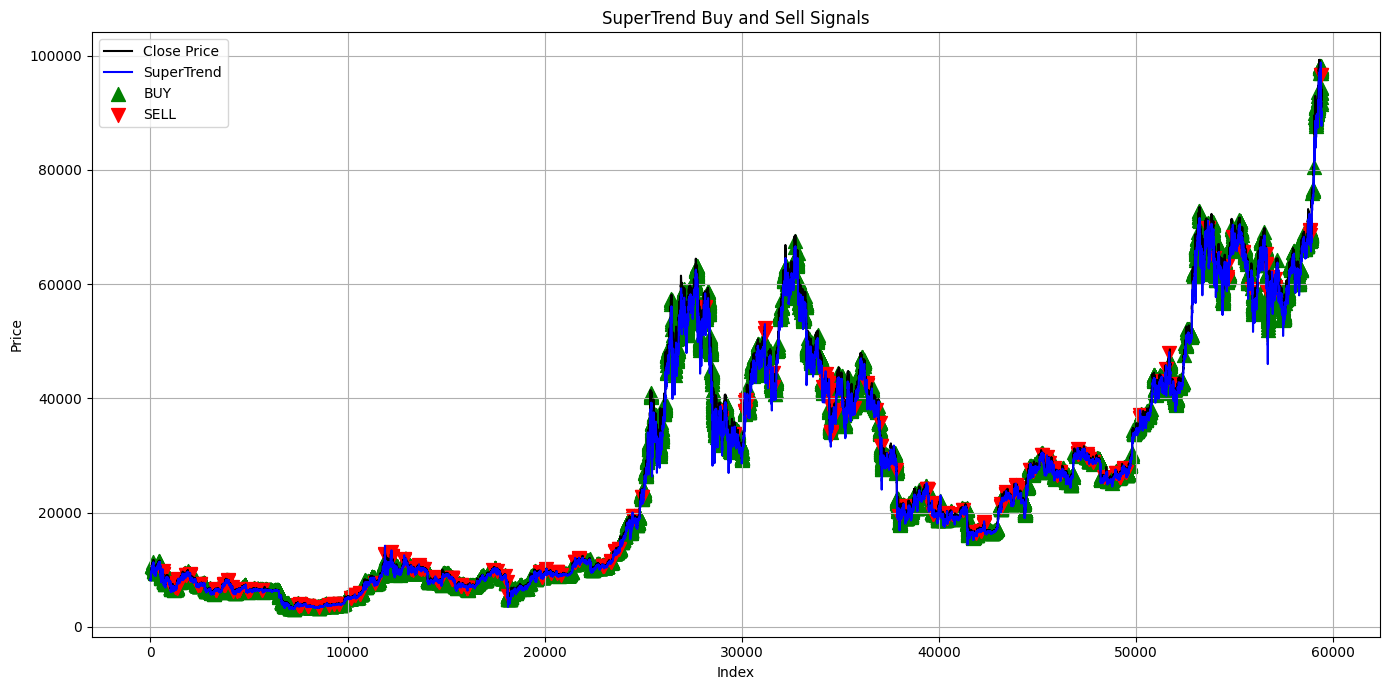

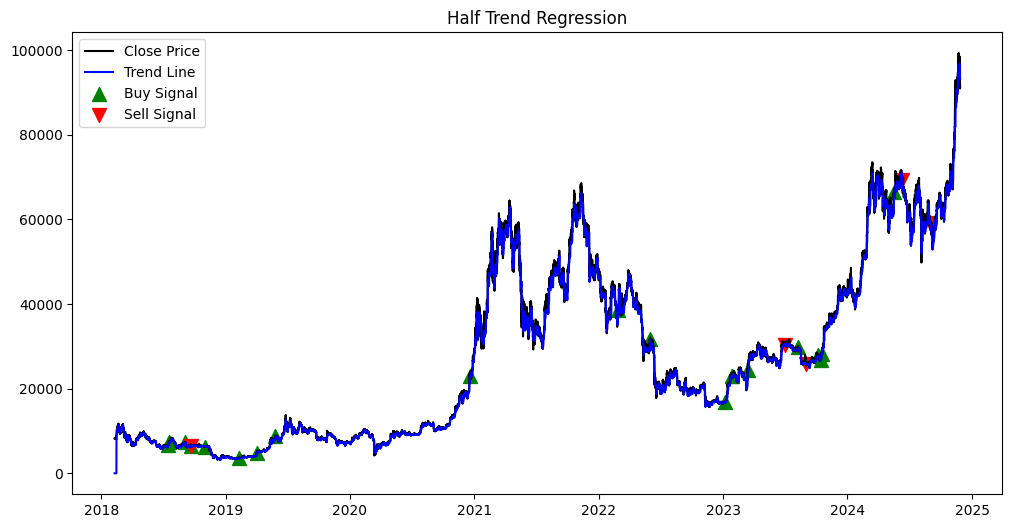

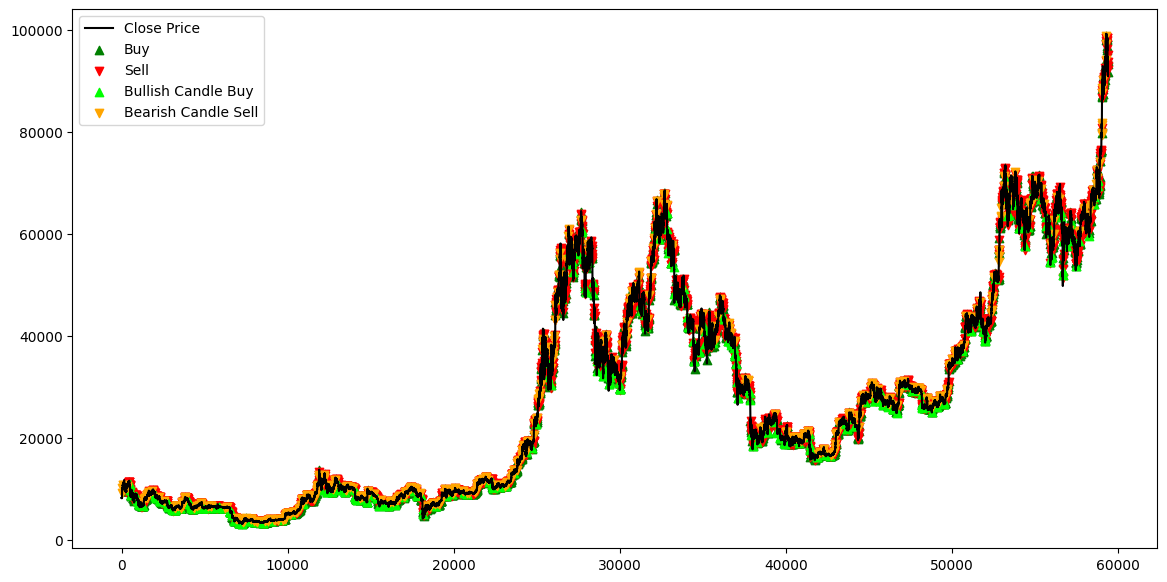

C:\Users\nuruj\Desktop\Bugu_v2\bugu_v3\bugu_technical_indicators.py:504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['hkOpen'].iloc[0] = (self.df['open'].iloc[0] + self.df['close'].iloc[0]) / 2


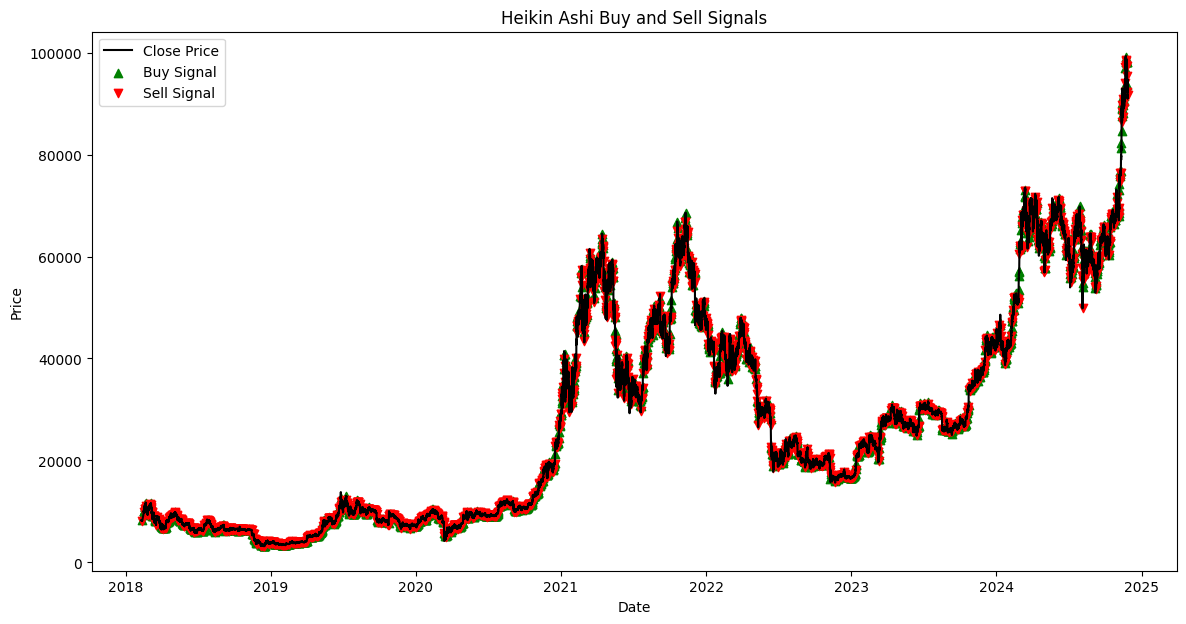

C:\Users\nuruj\Desktop\Bugu_v2\bugu_v3\bugu_technical_indicators.py:504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['hkOpen'].iloc[0] = (self.df['open'].iloc[0] + self.df['close'].iloc[0]) / 2


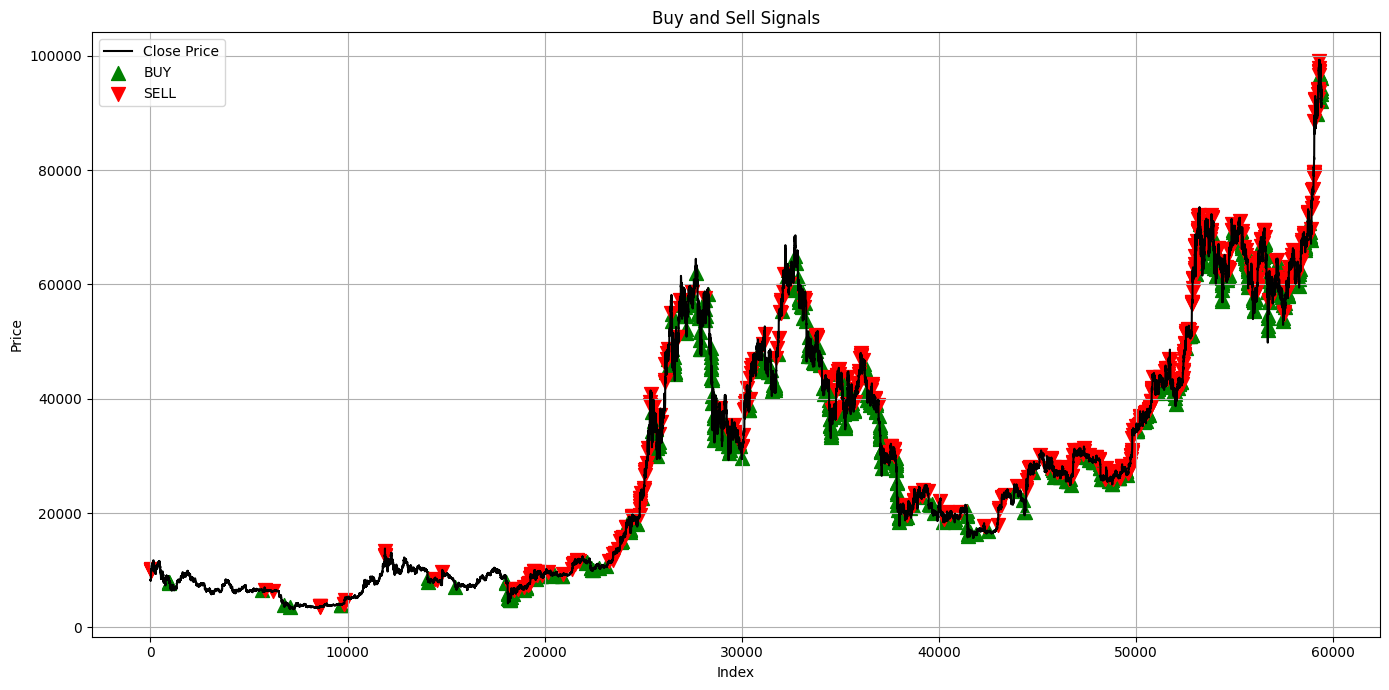

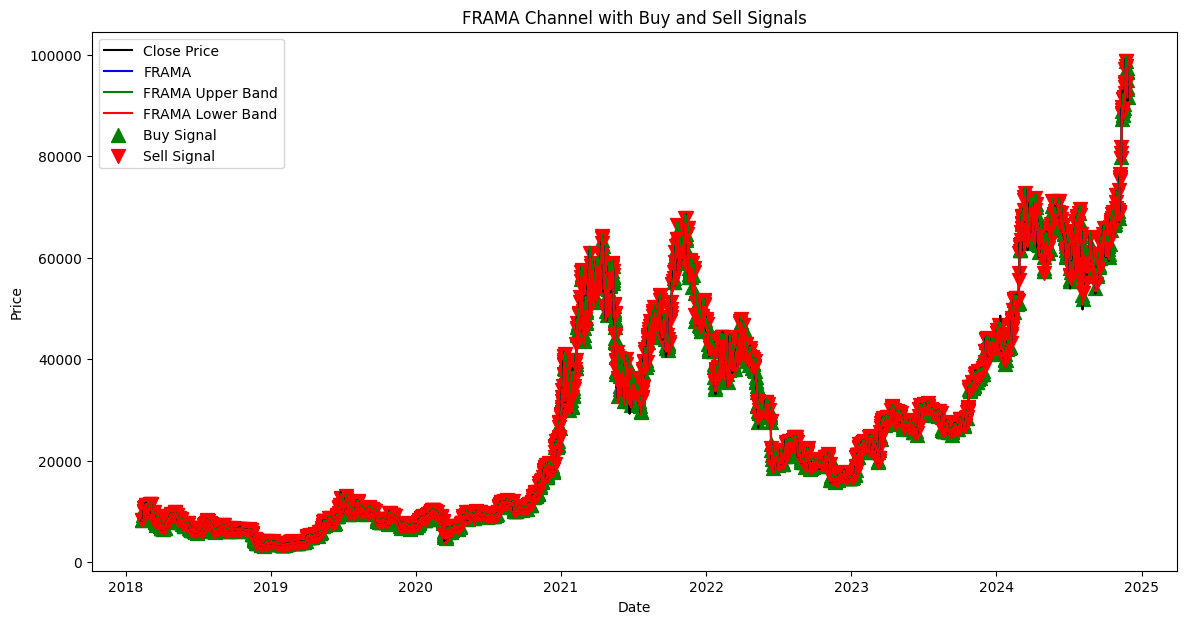

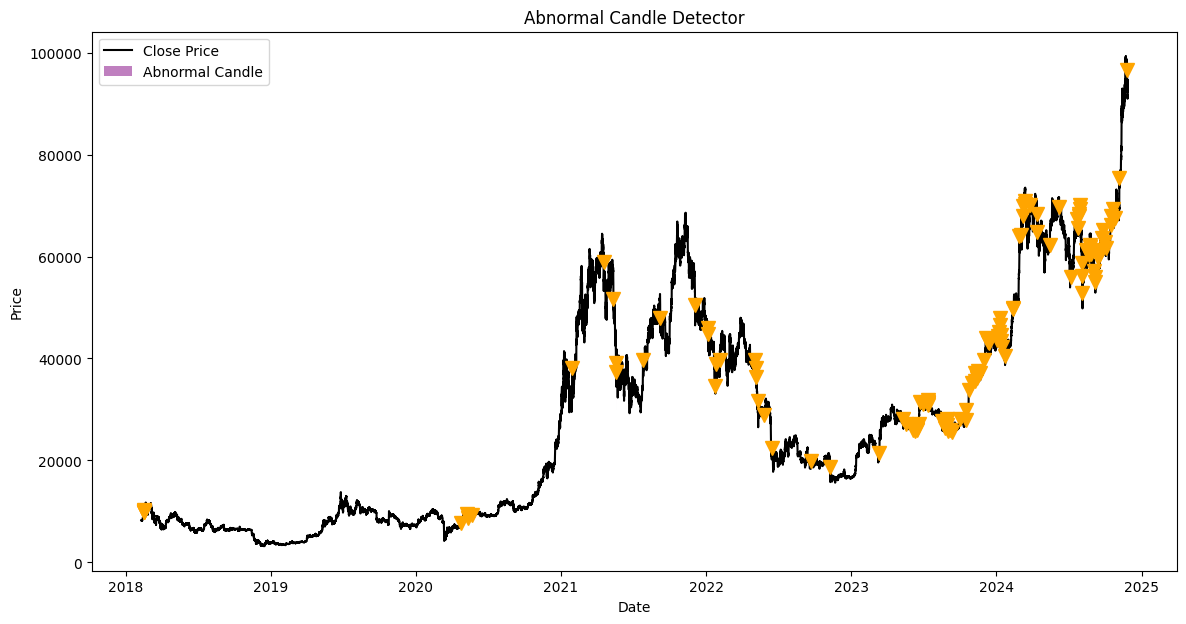

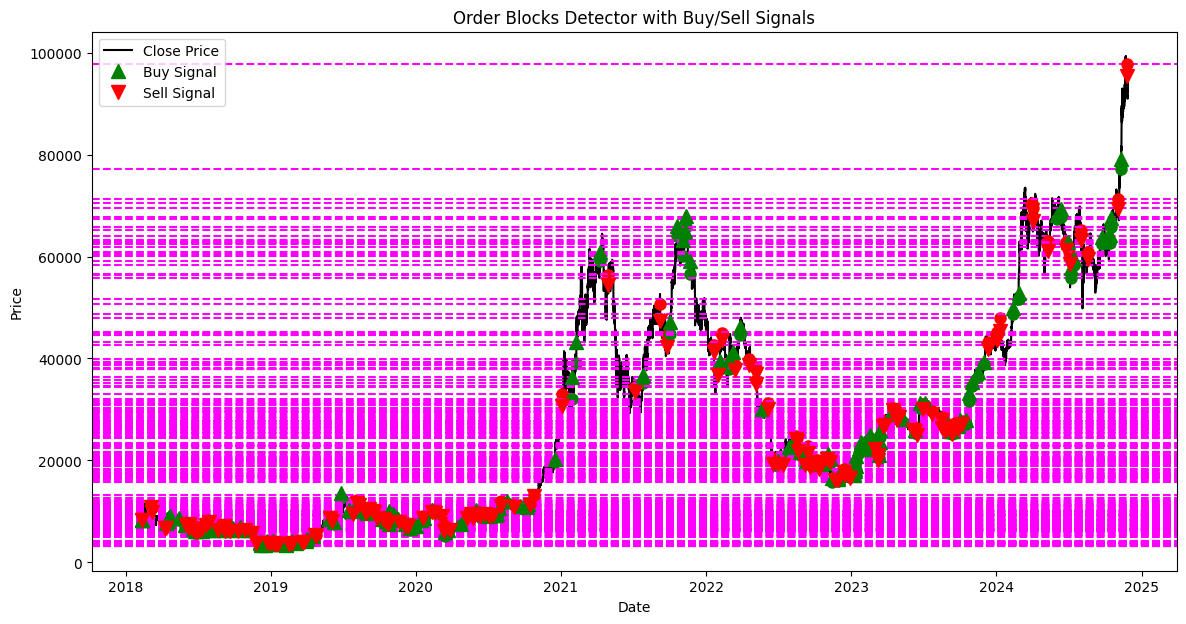

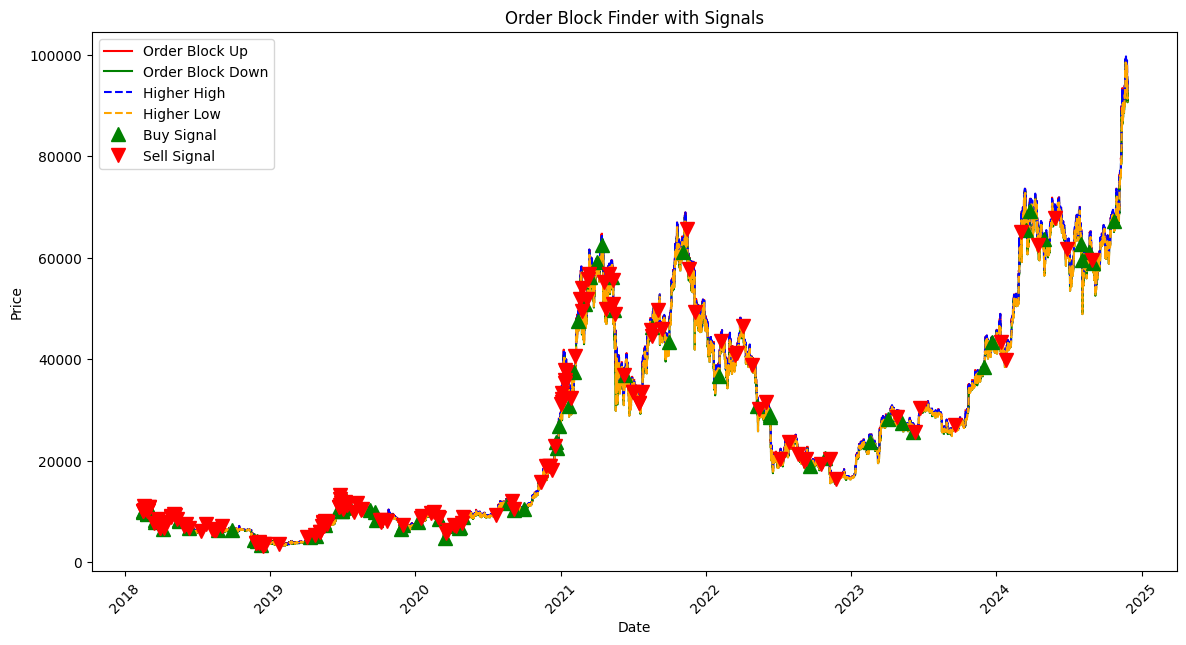

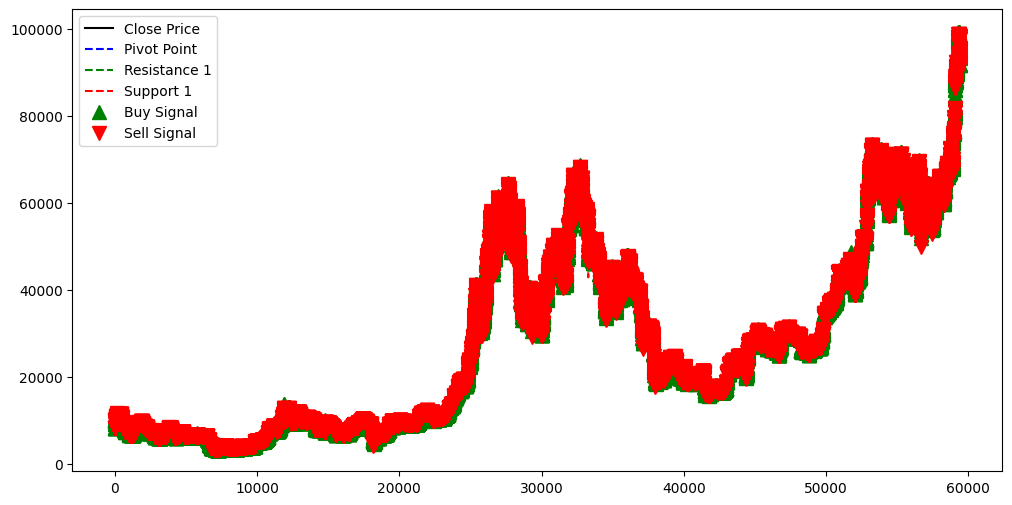

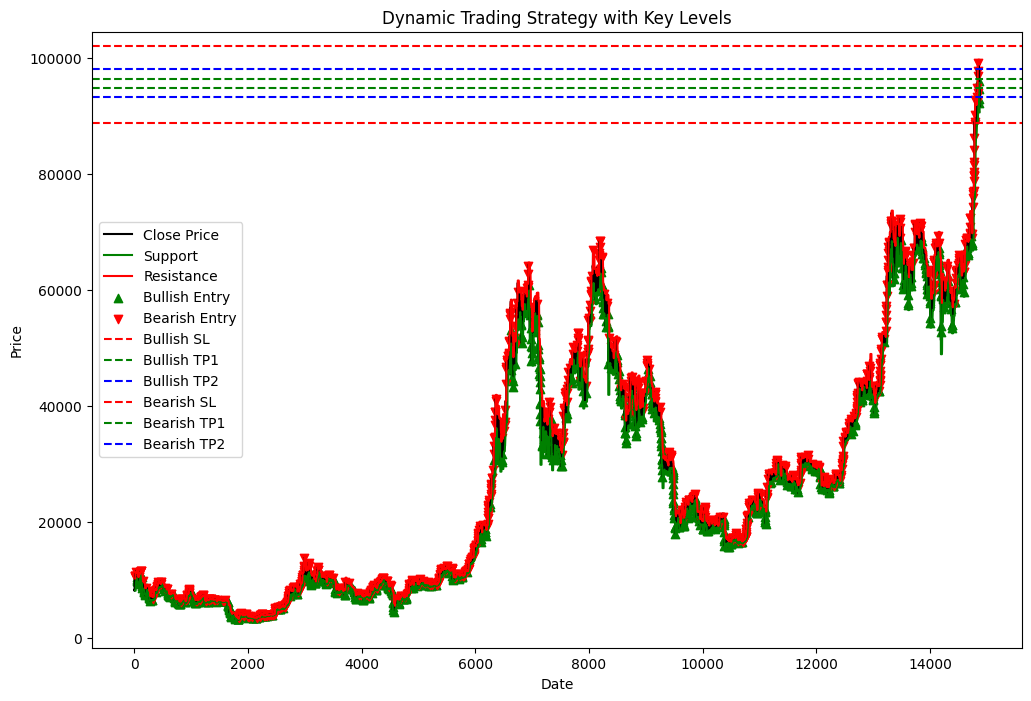

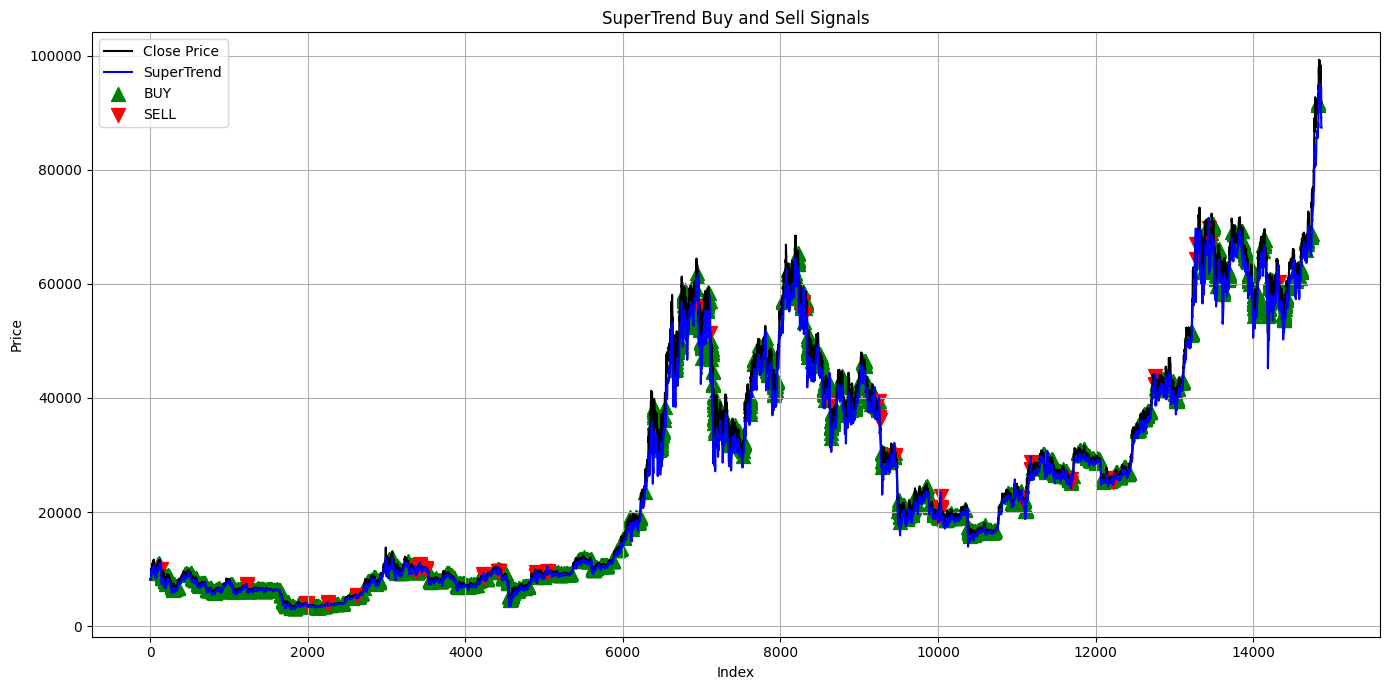

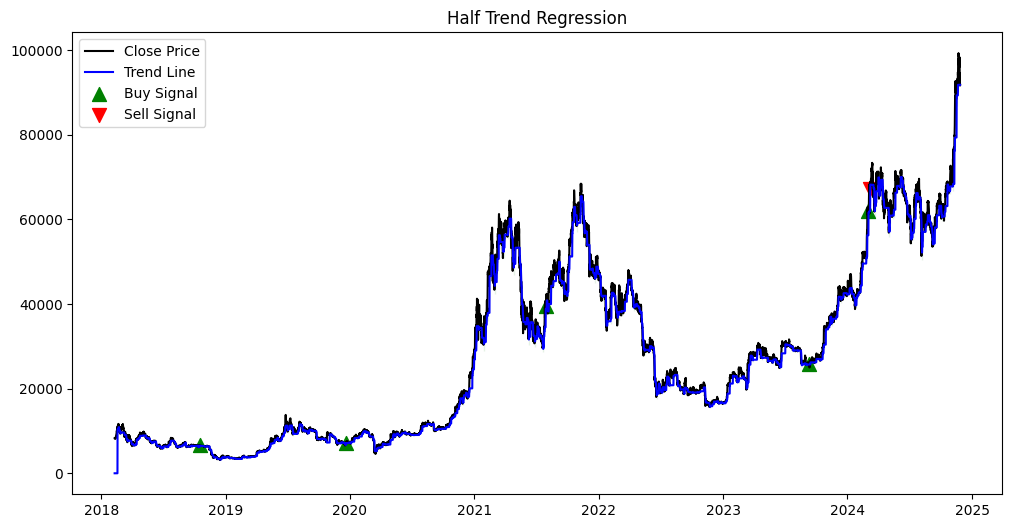

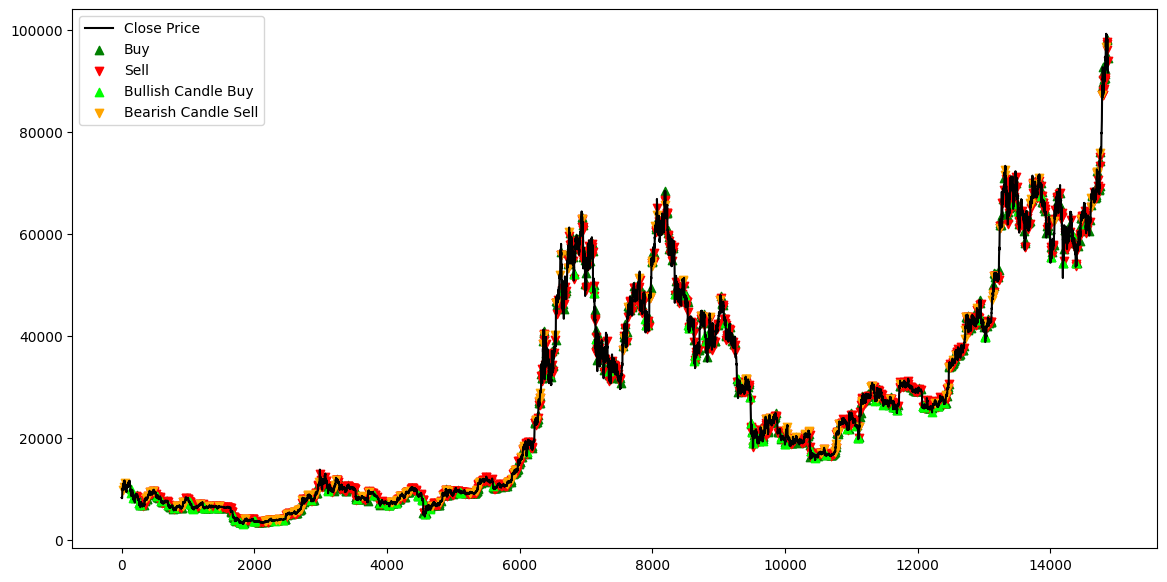

C:\Users\nuruj\Desktop\Bugu_v2\bugu_v3\bugu_technical_indicators.py:504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['hkOpen'].iloc[0] = (self.df['open'].iloc[0] + self.df['close'].iloc[0]) / 2


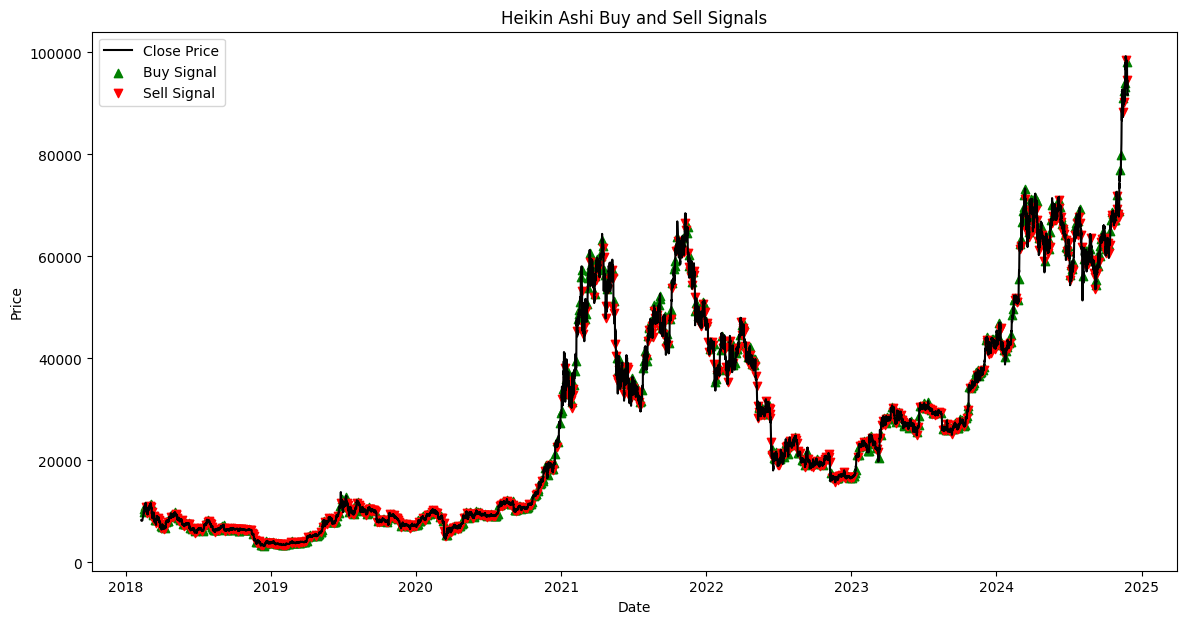

C:\Users\nuruj\Desktop\Bugu_v2\bugu_v3\bugu_technical_indicators.py:504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['hkOpen'].iloc[0] = (self.df['open'].iloc[0] + self.df['close'].iloc[0]) / 2


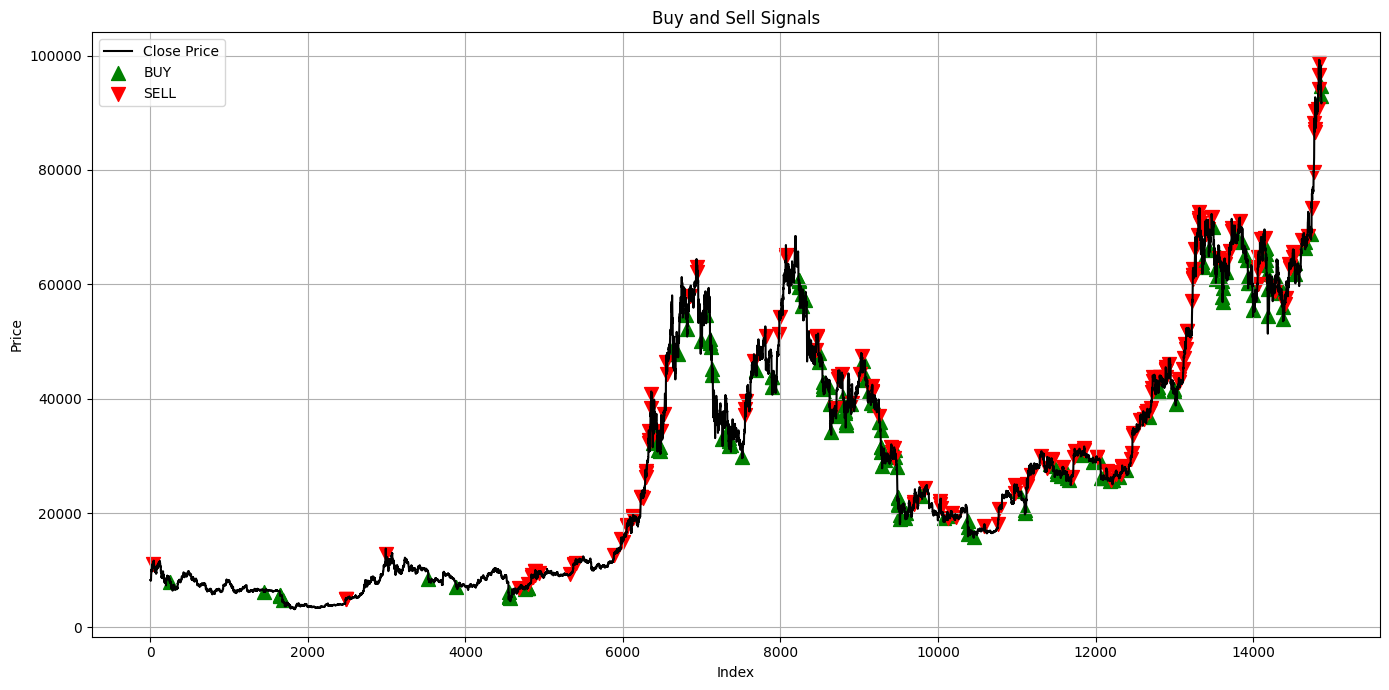

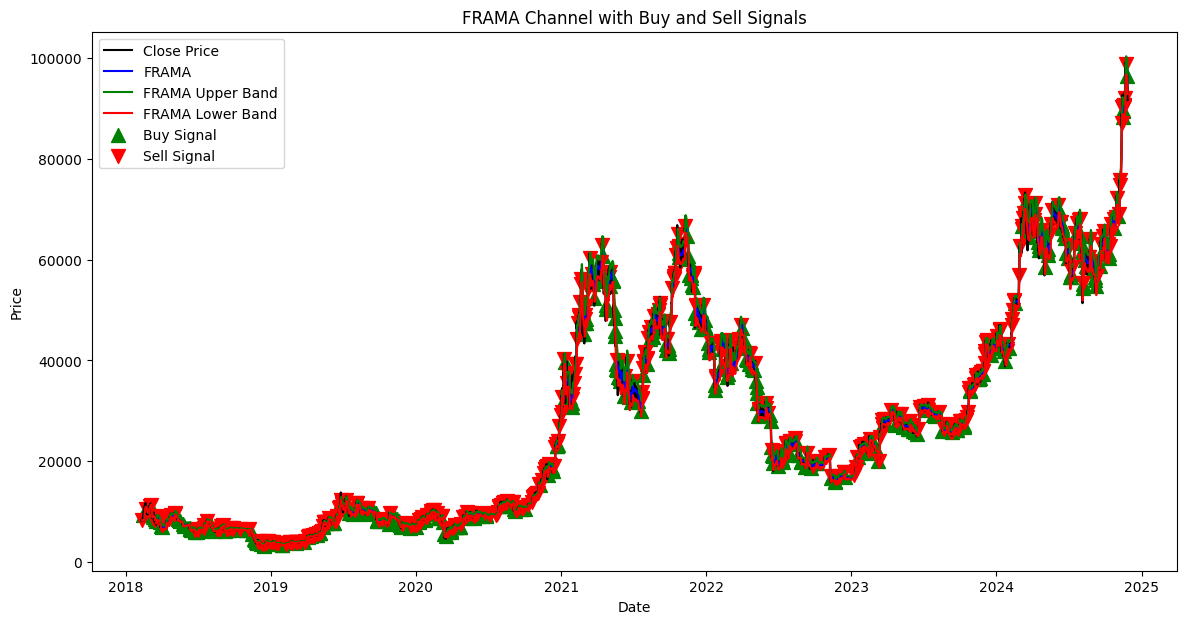

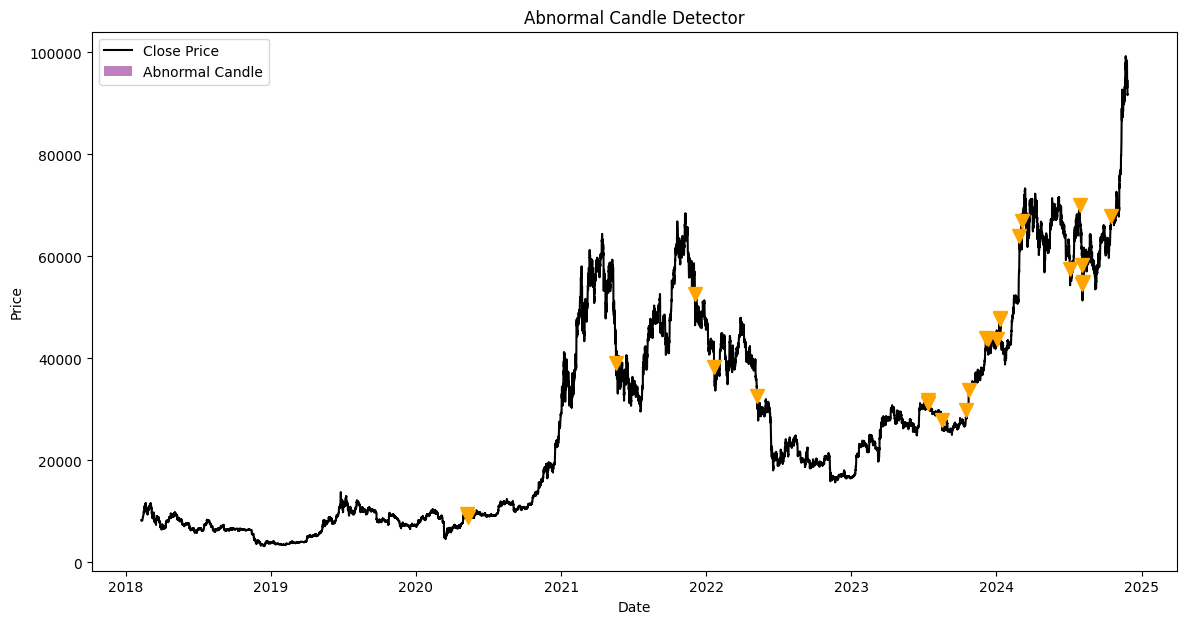

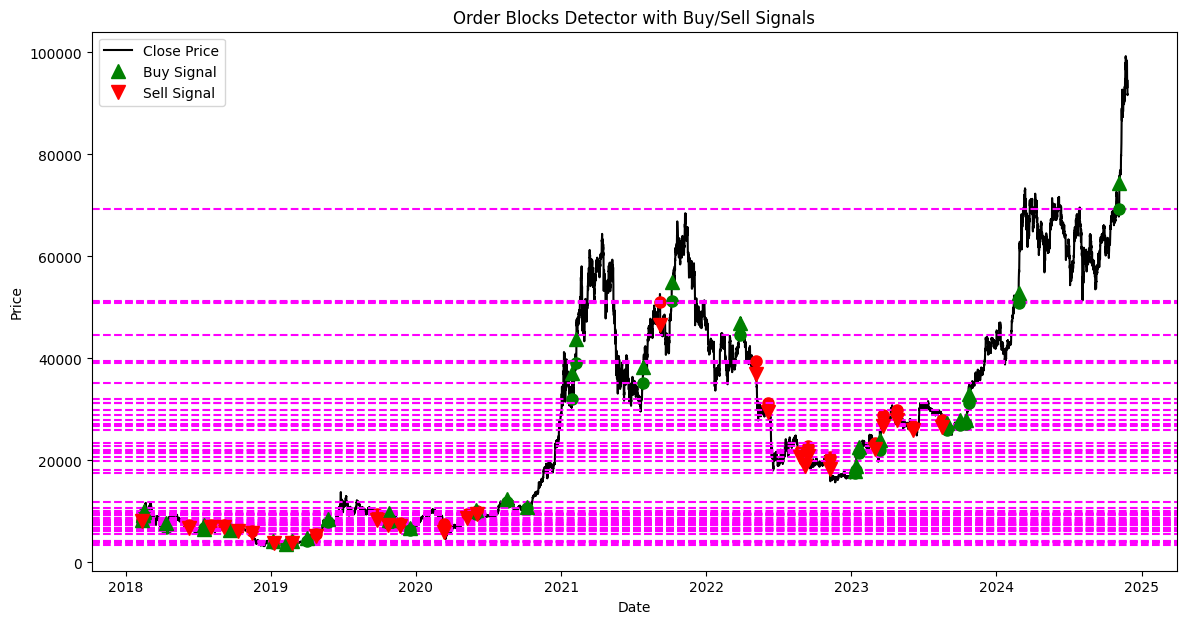

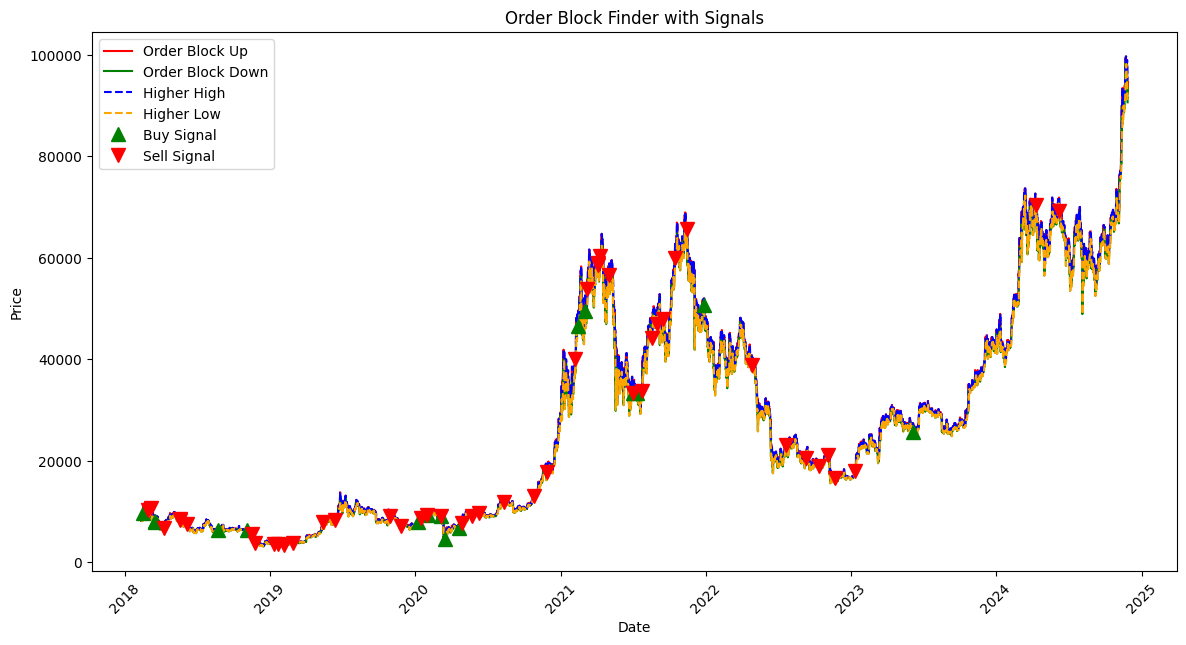

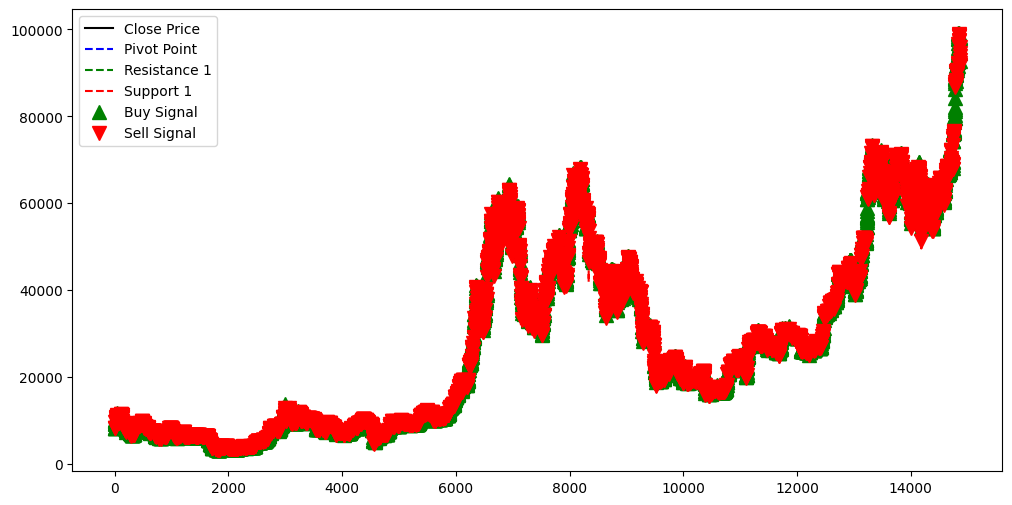

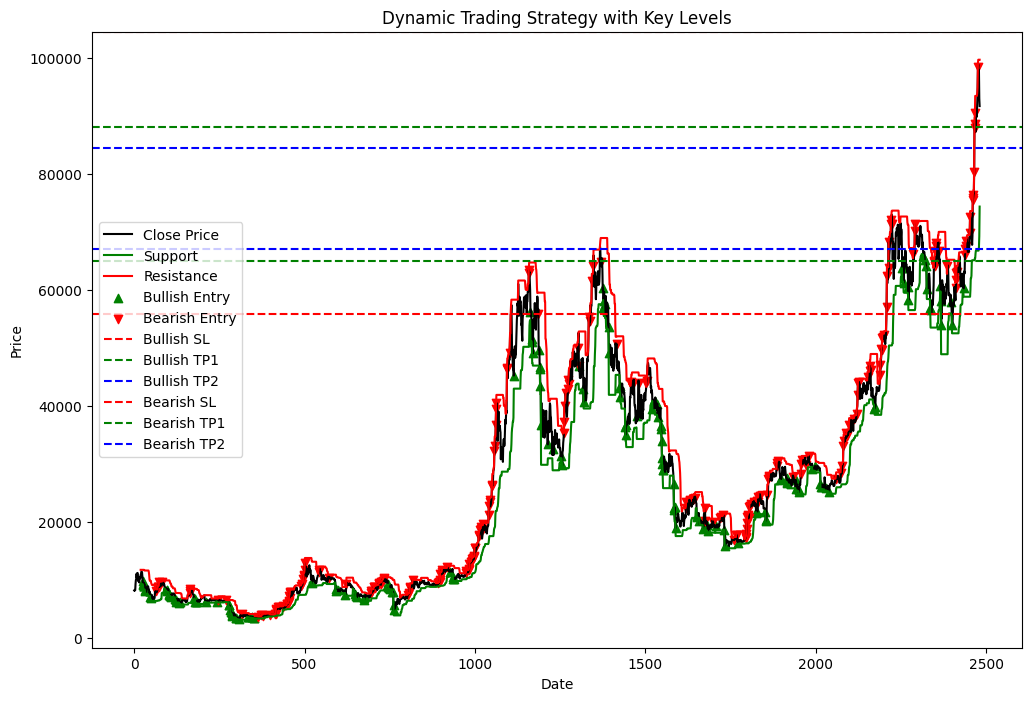

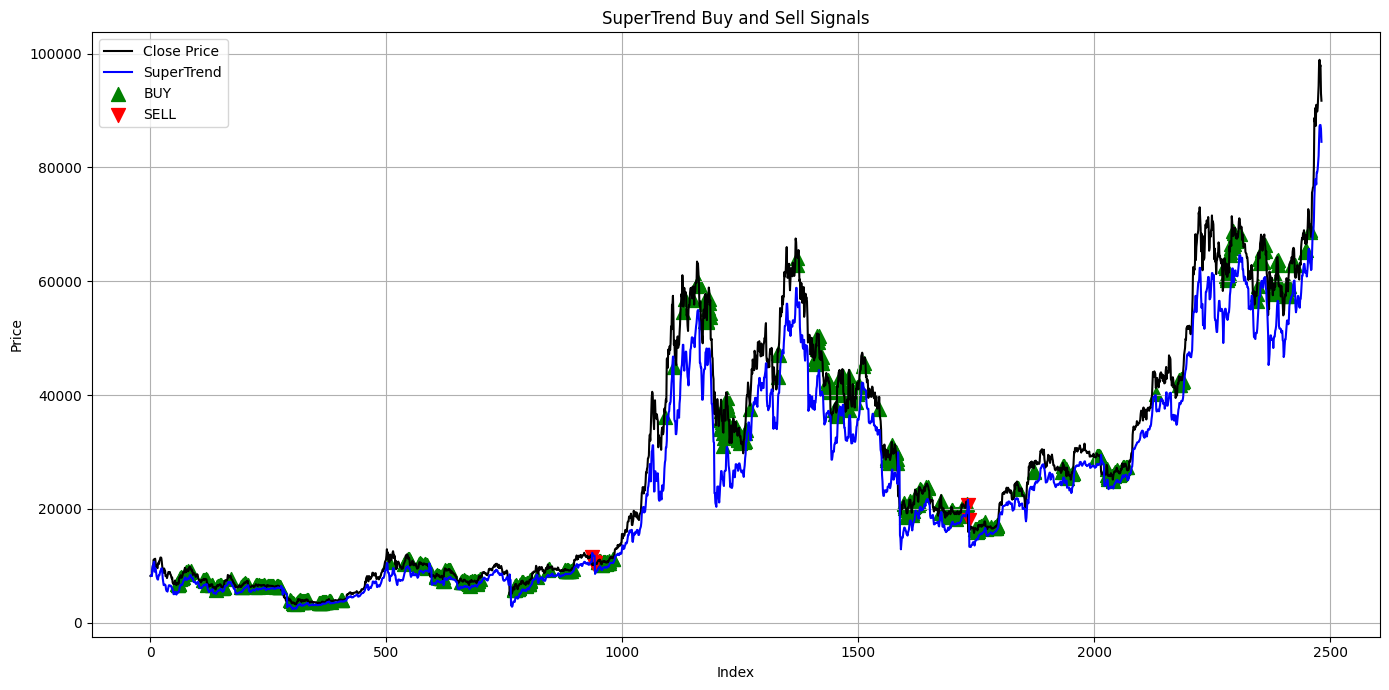

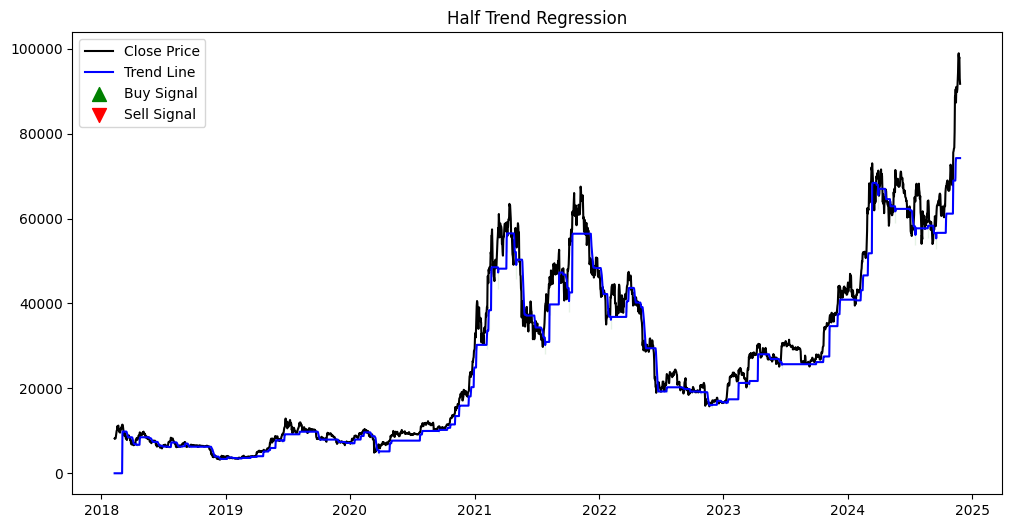

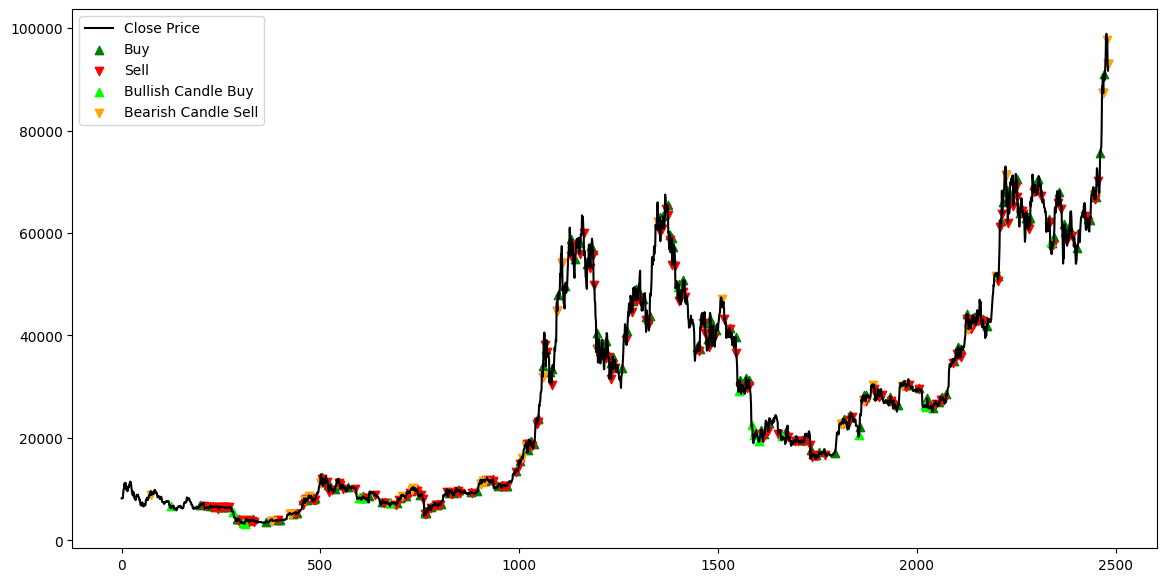

C:\Users\nuruj\Desktop\Bugu_v2\bugu_v3\bugu_technical_indicators.py:504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['hkOpen'].iloc[0] = (self.df['open'].iloc[0] + self.df['close'].iloc[0]) / 2


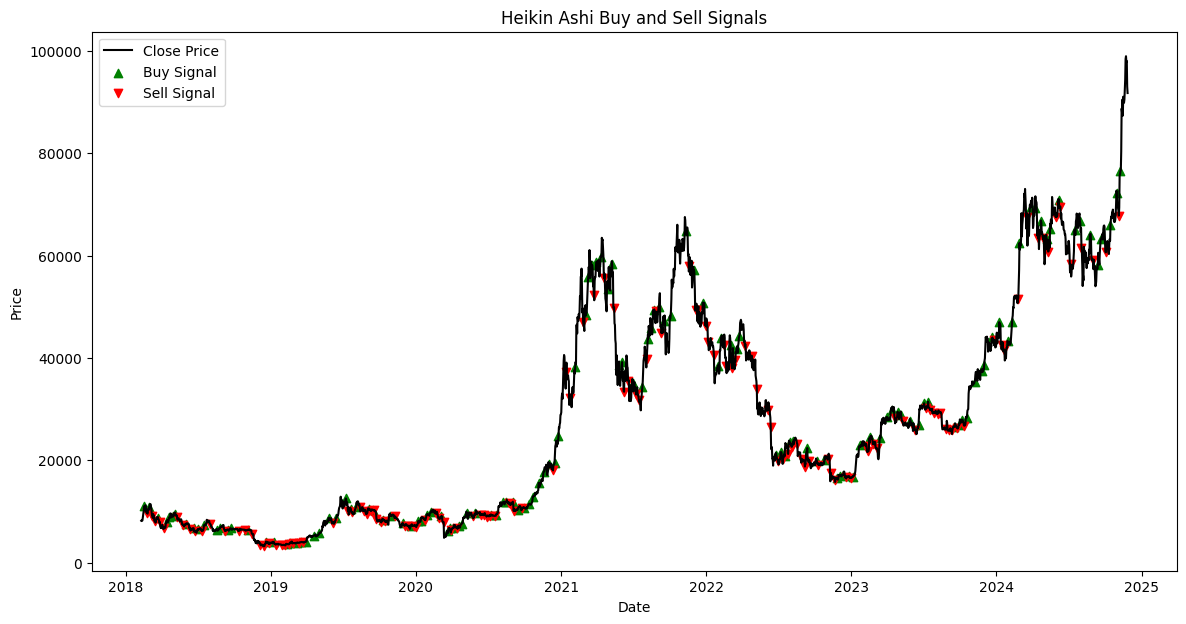

C:\Users\nuruj\Desktop\Bugu_v2\bugu_v3\bugu_technical_indicators.py:504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['hkOpen'].iloc[0] = (self.df['open'].iloc[0] + self.df['close'].iloc[0]) / 2


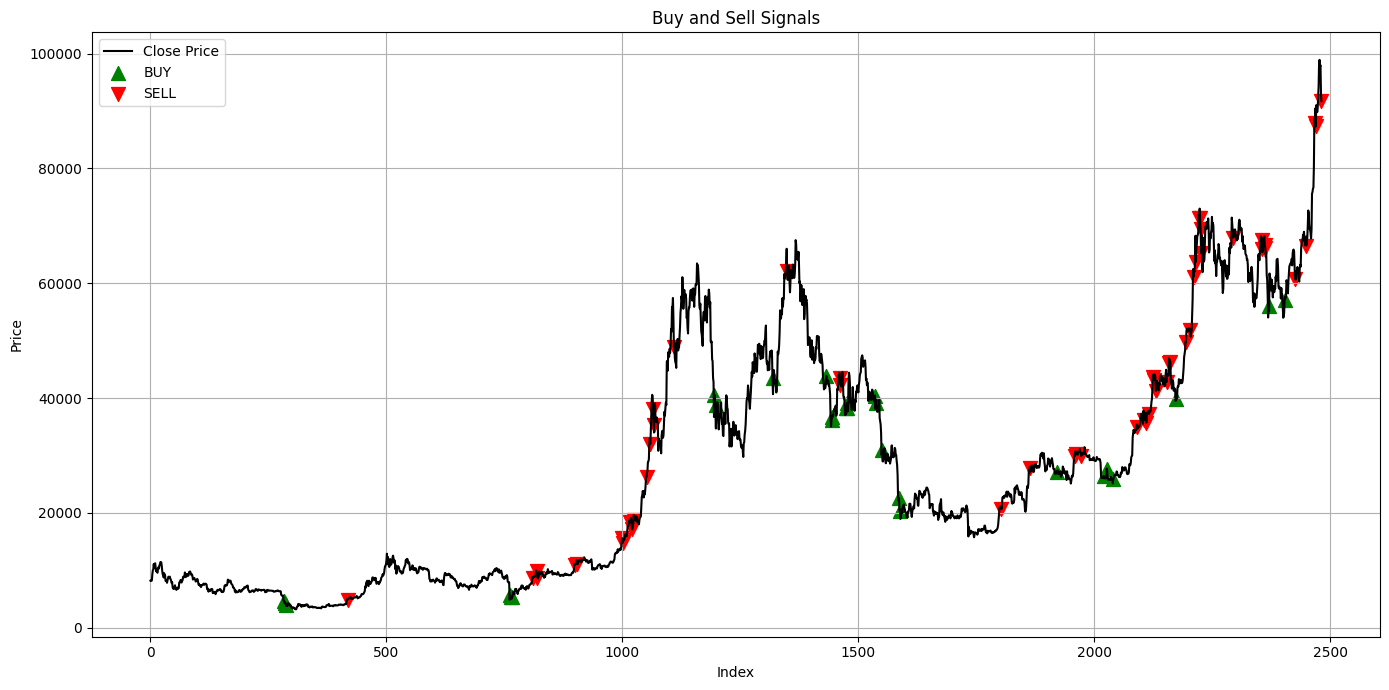

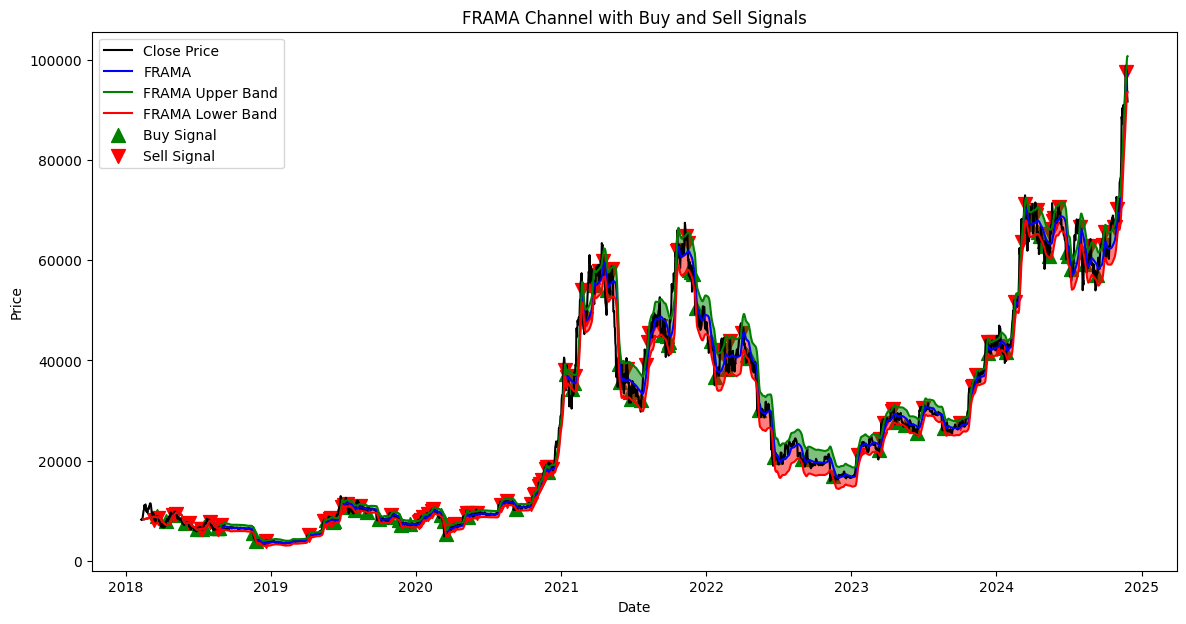

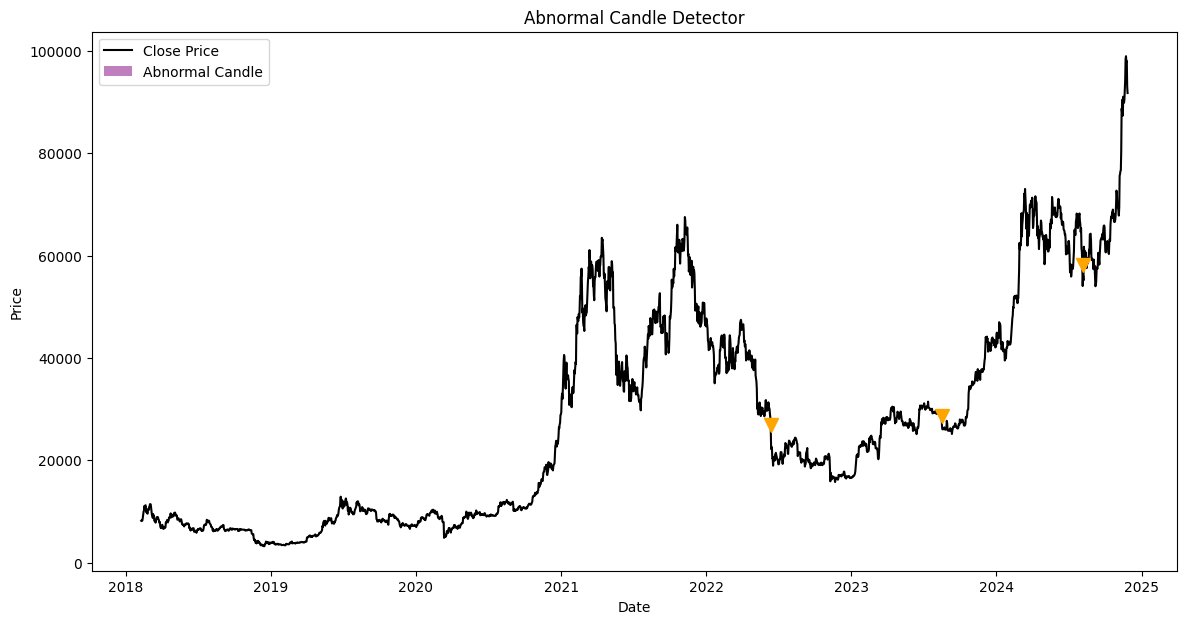

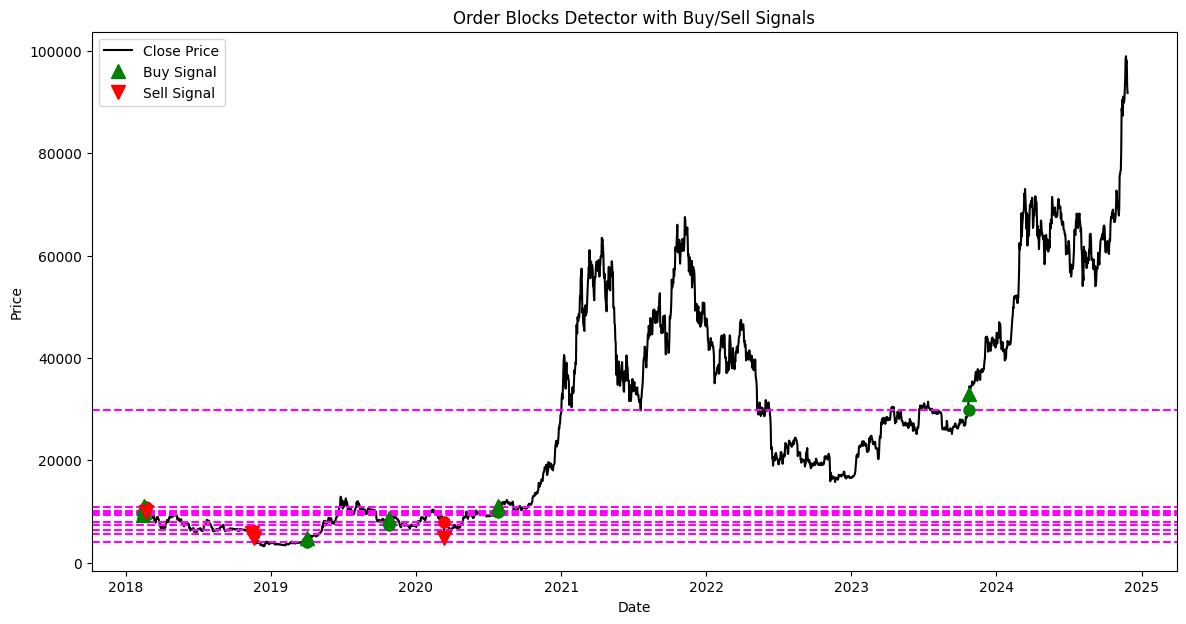

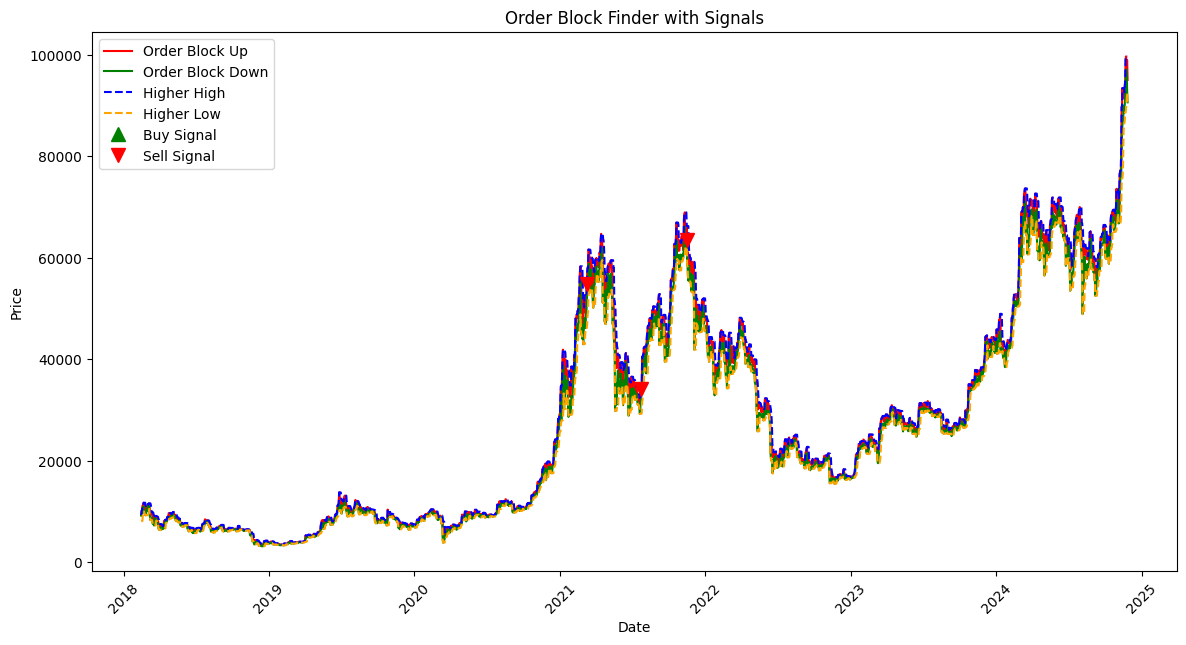

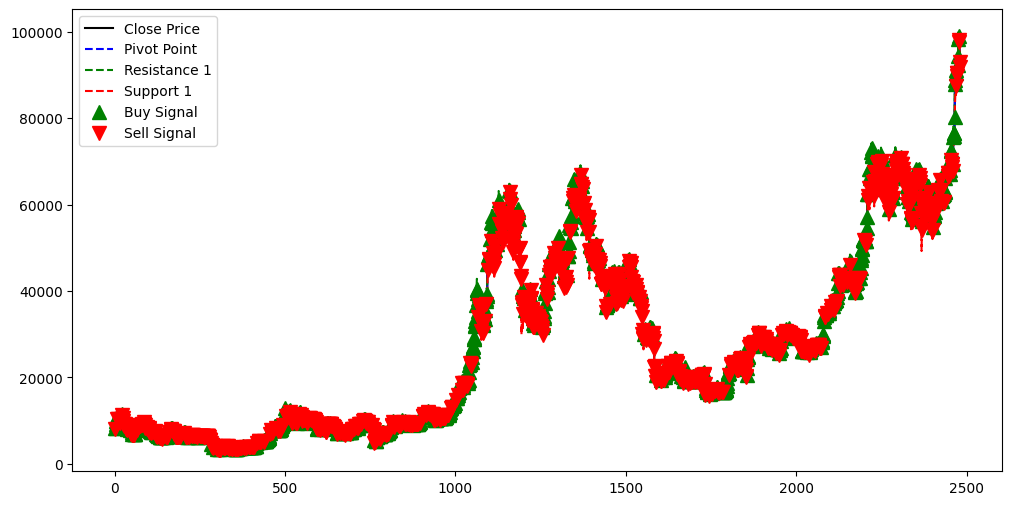

In [4]:
from bugu_machine_learning import RidgeModel, LinearRegressionModel, DecisionTree, ExtraTrees, GradientBoosting, AdaBoost_Simple, Bagging_Simple, RandomForest_Simple, TensorflowNN, ada_boost_r, random_forest_r
from bugu_trend_confirmation_indicator import analyze_market_trend
from bugu_technical_indicators import dynamic_trading_with_key_level, MachineLearningSupertrend, HalfTrendRegression, BuySellSignal, HeikinAshiSignals, TargetTrend, SignalGenerator, SwingHighLowAnalyzer, FRAMAChannel, AbnormalCandleDetector, OrderBlocksDetector, PsychoSignal, PrevGood, PivotPoints
from bugu_realtime_data import MT5DataFetcher
from bugu_news_sentiment import NewsSentimentAnalyzer
from bugu_volatility_model import ArchModels
from datetime import datetime
import pandas as pd
import numpy as np
import os

# Function to write output to file and print it
def write_output_to_file(output, filename):
    # Ensure the "analysis" folder exists
    if not os.path.exists("analysis"):
        os.makedirs("analysis")
    
    filepath = os.path.join("analysis", filename)
    
    with open(filepath, 'w') as f:
        f.write(output)
    
    with open(filepath, 'r') as f:
        print(f.read())





# Example usage

#print(csv_files)

api_key = '5cb98f18e3224b98bc1ddef0446b4dc0'
symbol = "BTCUSDm"
timeframes = ['H1','H4', 'D1']
data_fetcher = MT5DataFetcher(symbol, timeframes)
data_fetcher.initialize_mt5()
csv_files = data_fetcher.fetch_data()
output = f'''
Do a own research on {symbol.replace("m","")} and precisely find a trade desicion that will not loss. A buy or a sell or a hold.
If buy or sell then make a stop loss and taken profit.
'''
#output = " "
output += "\n"
# Current Data Section
print(f"{'#'*10} Latest data {'#'*10}")
output += f"{'#'*10} Latest data {'#'*10}\n"
#i = int(input("Enter timeframe: [0: M30; 1: H1, 2: H4, 3:D1, 4: W1]"))
data = pd.read_csv(f"{csv_files[1]}")
# Access the data from the DataFrame, not the filename string
current_high = data['high'].iloc[-1]
current_close = data['close'].iloc[-1]
current_low = data['low'].iloc[-1]
print(f"Current High: {current_high}, Close: {current_close}, Low: {current_low}")
output += f"Current High: {current_high}, Close: {current_close}, Low: {current_low}\n"


# News Analsysis Section
data = pd.read_csv(f"{csv_files[1]}")
symbol_news = symbol.replace("USDm","")
page_size = 10
news_analyzer = NewsSentimentAnalyzer(api_key, symbol=symbol_news, page_size=page_size)
import io
import sys
buffer = io.StringIO()
sys.stdout = buffer
news_analyzer.run_analysis()
#print(news_analyzer.run_analysis())
news_output = buffer.getvalue()
print(news_analyzer.run_analysis())
sys.stdout = sys.__stdout__
output += news_output
plot=True
i = 0
for files in csv_files:
    
    output += f"{'-'*10} {files} {'-'*10}\n"
    #data = pd.read_csv(csv_files[0]) 
    print(f"{'-'*10} Indicators Outputs {'-'*10}")
    output += f"{'-'*10} Indicators Outputs {'-'*10}\n"

    print(f"{'.'*5} dynamic_trading_with_key_level {'.'*5}")
    output += f"{'.'*5} dynamic_trading_with_key_level {'.'*5}\n"
    df = pd.read_csv(f'{csv_files[i]}')
    # Apply the dynamic trading strategy
    result_df = dynamic_trading_with_key_level(df, plot=plot)
    # Drop the unwanted columns
    result_df.drop(columns=['time.1', 'open', 'high', 'low', 'close', 'tick_volume', 'real_volume'], inplace=True)
    # Get the last row of the dataframe
    last_row = result_df.iloc[-1]

    # Print all columns from the last row in one go
    print(f"""
    time: {last_row['time']}, spread: {last_row['spread']}, ATR: {last_row['ATR']}, Volume_SMA: {last_row['Volume_SMA']}, Support: {last_row['Support']},Resistance: {last_row['Resistance']},
    Support_Buffer: {last_row['Support_Buffer']}, Resistance_Buffer: {last_row['Resistance_Buffer']},  Bullish_Entry: {last_row['Bullish_Entry']}, Bearish_Entry: {last_row['Bearish_Entry']},
    Bullish_SL: {last_row['Bullish_SL']}, Bullish_TP1: {last_row['Bullish_TP1']}, Bullish_TP2: {last_row['Bullish_TP2']}, Bearish_SL: {last_row['Bearish_SL']}, 
    Bearish_TP1: {last_row['Bearish_TP1']},Bearish_TP2: {last_row['Bearish_TP2']} 
    """)

    # Append all columns output to the `output` variable in one go
    # Append all columns output to the `output` variable in one go 
    output += f""" time: {last_row['time']}, spread: {last_row['spread']}, ATR: {last_row['ATR']}, Volume_SMA: {last_row['Volume_SMA']}, Support: {last_row['Support']}, Resistance: {last_row['Resistance']}, Support_Buffer: {last_row['Support_Buffer']}, Resistance_Buffer: {last_row['Resistance_Buffer']}, Bullish_Entry: {last_row['Bullish_Entry']}, Bearish_Entry: {last_row['Bearish_Entry']}, Bullish_SL: {last_row['Bullish_SL']}, Bullish_TP1: {last_row['Bullish_TP1']}, Bullish_TP2: {last_row['Bullish_TP2']}, Bearish_SL: {last_row['Bearish_SL']}, 
    Bearish_TP1: {last_row['Bearish_TP1']}, Bearish_TP2: {last_row['Bearish_TP2']} """

    
    print(f"{'.'*5} MachineLearningSupertrend {'.'*5}")
    output += f"{'.'*5} MachineLearningSupertrend {'.'*5}\n"
    df = pd.read_csv(f'{csv_files[i]}')
    ml_supertrend = MachineLearningSupertrend(df)
    ml_supertrend_df = ml_supertrend.machine_learning_supertrend(plot=plot)
    ml_supertrend_df.drop(columns=['time.1', 'open', 'high', 'low', 'close', 'tick_volume', 'real_volume'], inplace=True)
    last_row_ml = ml_supertrend_df.iloc[-1]

    # Print all columns from the last row in one go for MachineLearningSupertrend
    print(f"""
        time: {last_row_ml['time']}, spread: {last_row_ml['spread']}, volatility: {last_row_ml['volatility']}, upper_band: {last_row_ml['upper_band']},
        lower_band: {last_row_ml['lower_band']}, prev_lower_band: {last_row_ml['prev_lower_band']}, prev_upper_band: {last_row_ml['prev_upper_band']},
        direction: {last_row_ml['direction']}, supertrend: {last_row_ml['supertrend']}, rsi: {last_row_ml['rsi']}, macd_diff: {last_row_ml['macd_diff']},
        long_signal: {last_row_ml['long_signal']}, short_signal: {last_row_ml['short_signal']}
        """)

    # Append all columns output to the `output` variable in one go for MachineLearningSupertrend
    output += f"""
    time: {last_row_ml['time']}, spread: {last_row_ml['spread']}, volatility: {last_row_ml['volatility']}, upper_band: {last_row_ml['upper_band']},
    lower_band: {last_row_ml['lower_band']}, prev_lower_band: {last_row_ml['prev_lower_band']}, prev_upper_band: {last_row_ml['prev_upper_band']},
    direction: {last_row_ml['direction']}, supertrend: {last_row_ml['supertrend']}, rsi: {last_row_ml['rsi']}, macd_diff: {last_row_ml['macd_diff']},
    long_signal: {last_row_ml['long_signal']}, short_signal: {last_row_ml['short_signal']}
    """

    print(f"{'.'*5} half_trend_regression {'.'*5}")
    output += f"{'.'*5} half_trend_regression {'.'*5}\n"
    data = pd.read_csv(f'{csv_files[i]}')
    data['date'] = pd.to_datetime(data['time'])
    ht_regression = HalfTrendRegression(data)
    df, future_trend = ht_regression.half_trend_regression(plot=plot)
    print(f"The future trend is: {future_trend}")
    df.drop(columns=['time.1', 'open', 'high', 'low', 'close', 'tick_volume', 'real_volume'], inplace=True)
    last_row_ht = df.iloc[-1]

    # Print all columns from the last row in one go for HalfTrendRegression
    print(last_row_ht)

    # Append all columns output to the `output` variable in one go for HalfTrendRegression
    output += f"{last_row_ht}"



    print(f"{'.'*5} BuySellSignal {'.'*5}")
    output += f"{'.'*5} BuySellSignal {'.'*5}\n"
    # Example usage
    data = pd.read_csv(f'{csv_files[i]}')
    analyzer = BuySellSignal(data)
    trend = analyzer.analyze_trend(plot=plot)
    print(f"The current trend is: {trend}")
    data = analyzer.generate_signals()
    data.drop(columns=['time.1', 'open', 'high', 'low', 'close', 'tick_volume', 'real_volume'], inplace=True)
    last_row_bs = data.iloc[-1]
    last_row_ht = last_row_bs

    print(f"""time: {last_row_ht['time']}, spread: {last_row_ht['spread']}, smrng1: {last_row_ht['smrng1']}, smrng2: {last_row_ht['smrng2']},
        smrng: {last_row_ht['smrng']}, sma: {last_row_ht['sma']}, filt: {last_row_ht['filt']}, upward: {last_row_ht['upward']},
        downward: {last_row_ht['downward']}, longCond: {last_row_ht['longCond']}, shortCond: {last_row_ht['shortCond']}, CondIni: {last_row_ht['CondIni']},
        long: {last_row_ht['long']}, short: {last_row_ht['short']}, bullishCandle: {last_row_ht['bullishCandle']}, bearishCandle: {last_row_ht['bearishCandle']},
        rsi: {last_row_ht['rsi']}, isRSIOB: {last_row_ht['isRSIOB']}, isRSIOS: {last_row_ht['isRSIOS']}, tradeSignal: {last_row_ht['tradeSignal']}, signal: {last_row_ht['signal']}
        """)

    # Append all columns output to the `output` variable in one go for BuySellSignal
    output += f"""time: {last_row_ht['time']}, spread: {last_row_ht['spread']}, smrng1: {last_row_ht['smrng1']}, smrng2: {last_row_ht['smrng2']},
        smrng: {last_row_ht['smrng']}, sma: {last_row_ht['sma']}, filt: {last_row_ht['filt']}, upward: {last_row_ht['upward']},
        downward: {last_row_ht['downward']}, longCond: {last_row_ht['longCond']}, shortCond: {last_row_ht['shortCond']}, CondIni: {last_row_ht['CondIni']},
        long: {last_row_ht['long']}, short: {last_row_ht['short']}, bullishCandle: {last_row_ht['bullishCandle']}, bearishCandle: {last_row_ht['bearishCandle']},
        rsi: {last_row_ht['rsi']}, isRSIOB: {last_row_ht['isRSIOB']}, isRSIOS: {last_row_ht['isRSIOS']}, tradeSignal: {last_row_ht['tradeSignal']}, signal: {last_row_ht['signal']}
        """

    print(f"{'.'*5} HeikinAshiSignals {'.'*5}")
    output += f"{'.'*5} HeikinAshiSignals {'.'*5}\n"
    data = pd.read_csv(f'{csv_files[i]}')
    data['date'] = pd.to_datetime(data['time'])
    ha_signals = HeikinAshiSignals(data)
    trend = ha_signals.analyze_trend(plot=plot)
    signals = ha_signals.generate_signals()
    signals.drop(columns=['time.1', 'open', 'high', 'low', 'close', 'tick_volume', 'real_volume'], inplace=True)
    last_row_ha = signals.iloc[-1]

    # Print all columns from the last row in one go for HeikinAshiSignals
    print(f"""
        time: {last_row_ha['time']}, spread: {last_row_ha['spread']}, date: {last_row_ha['date']}, hkClose: {last_row_ha['hkClose']},
        hkOpen: {last_row_ha['hkOpen']}, hkHigh: {last_row_ha['hkHigh']}, hkLow: {last_row_ha['hkLow']}, isBullish: {last_row_ha['isBullish']},
        isBearish: {last_row_ha['isBearish']}, bullishCount: {last_row_ha['bullishCount']}, bearishCount: {last_row_ha['bearishCount']},
        buy_signal: {last_row_ha['buy_signal']}, sell_signal: {last_row_ha['sell_signal']}, signal: {last_row_ha['signal']}
        """)

    # Append all columns output to the `output` variable in one go for HeikinAshiSignals
    output += f"""
    time: {last_row_ha['time']}, spread: {last_row_ha['spread']}, date: {last_row_ha['date']}, hkClose: {last_row_ha['hkClose']},
    hkOpen: {last_row_ha['hkOpen']}, hkHigh: {last_row_ha['hkHigh']}, hkLow: {last_row_ha['hkLow']}, isBullish: {last_row_ha['isBullish']},
    isBearish: {last_row_ha['isBearish']}, bullishCount: {last_row_ha['bullishCount']}, bearishCount: {last_row_ha['bearishCount']},
    buy_signal: {last_row_ha['buy_signal']}, sell_signal: {last_row_ha['sell_signal']}, signal: {last_row_ha['signal']}
    """

    print(f"{'.'*5} SignalGenerator {'.'*5}")
    output += f"{'.'*5} SignalGenerator {'.'*5}\n"
    df = pd.read_csv(f'{csv_files[i]}')
    signal_generator = SignalGenerator(df)
    trend = signal_generator.analyze_trend(plot=plot)
    print(f"The current trend is: {trend}")
    report = signal_generator.generate_signals()
    report.drop(columns=['time.1', 'open', 'high', 'low', 'close', 'tick_volume', 'real_volume'], inplace=True)
    last_row_sg = report.iloc[-1]

    # Print all columns from the last row in one go for SignalGenerator
    print(f"""
        time: {last_row_sg['time']}, spread: {last_row_sg['spread']}, hlc3: {last_row_sg['hlc3']}, rsi: {last_row_sg['rsi']},
        smoothed_rsi: {last_row_sg['smoothed_rsi']}, highest_high: {last_row_sg['highest_high']}, lowest_low: {last_row_sg['lowest_low']},
        williams_r: {last_row_sg['williams_r']}, smoothed_williams_r: {last_row_sg['smoothed_williams_r']}, volume_average: {last_row_sg['volume_average']},
        recent_volume_average: {last_row_sg['recent_volume_average']}, is_green_candle: {last_row_sg['is_green_candle']}, is_red_candle: {last_row_sg['is_red_candle']},
        is_high_volume_b1: {last_row_sg['is_high_volume_b1']}, is_high_volume_b2: {last_row_sg['is_high_volume_b2']}, is_high_volume_s1: {last_row_sg['is_high_volume_s1']},
        is_high_volume_s2: {last_row_sg['is_high_volume_s2']}, ema_short: {last_row_sg['ema_short']}, ema_long: {last_row_sg['ema_long']},
        bullish_ema_cross: {last_row_sg['bullish_ema_cross']}, bearish_ema_cross: {last_row_sg['bearish_ema_cross']}, atr: {last_row_sg['atr']},
        long_stop: {last_row_sg['long_stop']}, short_stop: {last_row_sg['short_stop']}, psar: {last_row_sg['psar']}, psar_dir: {last_row_sg['psar_dir']},
        sell_signal: {last_row_sg['sell_signal']}, bull_weight_2: {last_row_sg['bull_weight_2']}, bear_weight_2: {last_row_sg['bear_weight_2']},
        bull_signal_2: {last_row_sg['bull_signal_2']}, bear_signal_2: {last_row_sg['bear_signal_2']}, rsi_williams_r_bull: {last_row_sg['rsi_williams_r_bull']},
        rsi_williams_r_bear: {last_row_sg['rsi_williams_r_bear']}, b1_buy: {last_row_sg['b1_buy']}, b2_buy: {last_row_sg['b2_buy']},
        b2_strong_buy: {last_row_sg['b2_strong_buy']}, s1_sell: {last_row_sg['s1_sell']}, s2_sell: {last_row_sg['s2_sell']},
        s2_strong_sell: {last_row_sg['s2_strong_sell']}, signal: {last_row_sg['signal']}
        """)

    # Append all columns output to the `output` variable in one go for SignalGenerator
    output += f"""
    time: {last_row_sg['time']}, spread: {last_row_sg['spread']}, hlc3: {last_row_sg['hlc3']}, rsi: {last_row_sg['rsi']},
    smoothed_rsi: {last_row_sg['smoothed_rsi']}, highest_high: {last_row_sg['highest_high']}, lowest_low: {last_row_sg['lowest_low']},
    williams_r: {last_row_sg['williams_r']}, smoothed_williams_r: {last_row_sg['smoothed_williams_r']}, volume_average: {last_row_sg['volume_average']},
    recent_volume_average: {last_row_sg['recent_volume_average']}, is_green_candle: {last_row_sg['is_green_candle']}, is_red_candle: {last_row_sg['is_red_candle']},
    is_high_volume_b1: {last_row_sg['is_high_volume_b1']}, is_high_volume_b2: {last_row_sg['is_high_volume_b2']}, is_high_volume_s1: {last_row_sg['is_high_volume_s1']},
    is_high_volume_s2: {last_row_sg['is_high_volume_s2']}, ema_short: {last_row_sg['ema_short']}, ema_long: {last_row_sg['ema_long']},
    bullish_ema_cross: {last_row_sg['bullish_ema_cross']}, bearish_ema_cross: {last_row_sg['bearish_ema_cross']}, atr: {last_row_sg['atr']},
    long_stop: {last_row_sg['long_stop']}, short_stop: {last_row_sg['short_stop']}, psar: {last_row_sg['psar']}, psar_dir: {last_row_sg['psar_dir']},
    sell_signal: {last_row_sg['sell_signal']}, bull_weight_2: {last_row_sg['bull_weight_2']}, bear_weight_2: {last_row_sg['bear_weight_2']},
    bull_signal_2: {last_row_sg['bull_signal_2']}, bear_signal_2: {last_row_sg['bear_signal_2']}, rsi_williams_r_bull: {last_row_sg['rsi_williams_r_bull']},
    rsi_williams_r_bear: {last_row_sg['rsi_williams_r_bear']}, b1_buy: {last_row_sg['b1_buy']}, b2_buy: {last_row_sg['b2_buy']},
    b2_strong_buy: {last_row_sg['b2_strong_buy']}, s1_sell: {last_row_sg['s1_sell']}, s2_sell: {last_row_sg['s2_sell']},
    s2_strong_sell: {last_row_sg['s2_strong_sell']}, signal: {last_row_sg['signal']}
    """


       # Example usage
    print(f"{'.'*5} FRAMAChannel {'.'*5}")
    output += f"{'.'*5} FRAMAChannel {'.'*5}\n"
    frama_channel = FRAMAChannel(csv_files[i])
    full_data, last_10_rows = frama_channel.analyze(plot=plot)
    # Drop the unwanted columns
    full_data.drop(columns=['time.1', 'open', 'high', 'low', 'close', 'tick_volume', 'real_volume'], inplace=True)
    last_row_frama = full_data.iloc[-1]

    # Print all columns from the last row in one go for FRAMAChannel
    print(f"""
        time: {last_row_frama['time']}, spread: {last_row_frama['spread']}, date: {last_row_frama['date']}, hl2: {last_row_frama['hl2']},
        volatility: {last_row_frama['volatility']}, Filt: {last_row_frama['Filt']}, Filt1: {last_row_frama['Filt1']}, Filt2: {last_row_frama['Filt2']},
        buy_signal: {last_row_frama['buy_signal']}, sell_signal: {last_row_frama['sell_signal']}
        """)

    # Append all columns output to the `output` variable in one go for FRAMAChannel
    output += f"""
    time: {last_row_frama['time']}, spread: {last_row_frama['spread']}, date: {last_row_frama['date']}, hl2: {last_row_frama['hl2']},
    volatility: {last_row_frama['volatility']}, Filt: {last_row_frama['Filt']}, Filt1: {last_row_frama['Filt1']}, Filt2: {last_row_frama['Filt2']},
    buy_signal: {last_row_frama['buy_signal']}, sell_signal: {last_row_frama['sell_signal']}
    """

    # Example usage
    print(f"{'.'*5} AbnormalCandleDetector {'.'*5}")
    output += f"{'.'*5} AbnormalCandleDetector {'.'*5}\n"
    detector = AbnormalCandleDetector(csv_files[i])
    result_data = detector.analyze(plot=plot)
    # Drop the unwanted columns
    result_data.drop(columns=['time.1', 'open', 'high', 'low', 'close', 'tick_volume', 'real_volume'], inplace=True)
    last_row_acd = result_data.iloc[-1]

    # Print all columns from the last row in one go for AbnormalCandleDetector
    print(f"""
        time: {last_row_acd['time']}, spread: {last_row_acd['spread']}, date: {last_row_acd['date']}, candle_size: {last_row_acd['candle_size']},
        avg_candle_size: {last_row_acd['avg_candle_size']}, volume_avg: {last_row_acd['volume_avg']}, is_abnormal_size: {last_row_acd['is_abnormal_size']},
        is_abnormal_volume: {last_row_acd['is_abnormal_volume']}, is_abnormal_candle: {last_row_acd['is_abnormal_candle']}
        """)

    # Append all columns output to the `output` variable in one go for AbnormalCandleDetector
    output += f"""
    time: {last_row_acd['time']}, spread: {last_row_acd['spread']}, date: {last_row_acd['date']}, candle_size: {last_row_acd['candle_size']},
    avg_candle_size: {last_row_acd['avg_candle_size']}, volume_avg: {last_row_acd['volume_avg']}, is_abnormal_size: {last_row_acd['is_abnormal_size']},
    is_abnormal_volume: {last_row_acd['is_abnormal_volume']}, is_abnormal_candle: {last_row_acd['is_abnormal_candle']}
    """


        # Example usage
    print(f"{'.'*5} OrderBlocksDetector {'.'*5}")
    output += f"{'.'*5} OrderBlocksDetector {'.'*5}\n"
    detector = OrderBlocksDetector(csv_files[i])
    result_data = detector.analyze(plot=plot)
    # Drop the unwanted columns
    result_data.drop(columns=['time.1', 'open', 'high', 'low', 'close', 'tick_volume', 'real_volume'], inplace=True)
    last_row_ob = result_data.iloc[-1]

    # Print all columns from the last row in one go for OrderBlocksDetector
    print(f"""
        time: {last_row_ob['time']}, spread: {last_row_ob['spread']}, date: {last_row_ob['date']}, ATR: {last_row_ob['ATR']},
        order_block: {last_row_ob['order_block']}, order_block_type: {last_row_ob['order_block_type']}, buy_signal: {last_row_ob['buy_signal']},
        sell_signal: {last_row_ob['sell_signal']}
        """)

    # Append all columns output to the `output` variable in one go for OrderBlocksDetector
    output += f"""
    time: {last_row_ob['time']}, spread: {last_row_ob['spread']}, date: {last_row_ob['date']}, ATR: {last_row_ob['ATR']},
    order_block: {last_row_ob['order_block']}, order_block_type: {last_row_ob['order_block_type']}, buy_signal: {last_row_ob['buy_signal']},
    sell_signal: {last_row_ob['sell_signal']}
    """

    print(f"{'.'*5} PsychoSignal {'.'*5}")
    output += f"{'.'*5} PsychoSignal {'.'*5}\n"
    # Example usage
    psycho_signal = PsychoSignal(csv_files[i])
    result_data = psycho_signal.analyze(plot=plot)
    result_data.drop(columns=['time.1', 'open', 'high', 'low', 'close', 'tick_volume', 'real_volume'], inplace=True)
    last_row_ps = result_data.iloc[-1]

    # Print all columns from the last row in one go for PsychoSignal
    print(f"""
        time: {last_row_ps['time']}, spread: {last_row_ps['spread']}, date: {last_row_ps['date']}, higherHigh: {last_row_ps['higherHigh']},
        higherLow: {last_row_ps['higherLow']}, highestLevel: {last_row_ps['highestLevel']}, lowestLevel: {last_row_ps['lowestLevel']},
        impulseMoveUp: {last_row_ps['impulseMoveUp']}, impulseMoveDown: {last_row_ps['impulseMoveDown']}, orderBlockUp: {last_row_ps['orderBlockUp']},
        orderBlockDown: {last_row_ps['orderBlockDown']}, orderBlockRangeUp: {last_row_ps['orderBlockRangeUp']}, orderBlockRangeDown: {last_row_ps['orderBlockRangeDown']},
        buySignal: {last_row_ps['buySignal']}, sellSignal: {last_row_ps['sellSignal']}
        """)

    # Append all columns output to the `output` variable in one go for PsychoSignal
    output += f"""
    time: {last_row_ps['time']}, spread: {last_row_ps['spread']}, date: {last_row_ps['date']}, higherHigh: {last_row_ps['higherHigh']},
    higherLow: {last_row_ps['higherLow']}, highestLevel: {last_row_ps['highestLevel']}, lowestLevel: {last_row_ps['lowestLevel']},
    impulseMoveUp: {last_row_ps['impulseMoveUp']}, impulseMoveDown: {last_row_ps['impulseMoveDown']}, orderBlockUp: {last_row_ps['orderBlockUp']},
    orderBlockDown: {last_row_ps['orderBlockDown']}, orderBlockRangeUp: {last_row_ps['orderBlockRangeUp']}, orderBlockRangeDown: {last_row_ps['orderBlockRangeDown']},
    buySignal: {last_row_ps['buySignal']}, sellSignal: {last_row_ps['sellSignal']}
    """

    print(f"{'.'*5} PrevGood {'.'*5}")
    output += f"{'.'*5} PrevGood {'.'*5}\n"
    df = pd.read_csv(csv_files[i])  
    df['date'] = pd.to_datetime(df['time'])  # Ensure 'date' column is correctly set 
    prev_good = PrevGood(df) 
    df_with_signals = prev_good.prev_good_indicator(plot=False)
    last_row_pg = df_with_signals.iloc[-1]

    # Print all columns from the last row in one go for PrevGood
    print(f"""
        date: {last_row_pg['date']}, SMA_50: {last_row_pg['SMA_50']}, STOCH_%K: {last_row_pg['STOCH_%K']}, MACD: {last_row_pg['MACD']},
        RSI: {last_row_pg['RSI']}, SMA_50_MT: {last_row_pg['SMA_50_MT']}, STOCH_%K_MT: {last_row_pg['STOCH_%K_MT']}, Buy_Signal: {last_row_pg['Buy_Signal']},
        Sell_Signal: {last_row_pg['Sell_Signal']}
        """)

    # Append all columns output to the `output` variable in one go for PrevGood
    output += f"""
    date: {last_row_pg['date']}, SMA_50: {last_row_pg['SMA_50']}, STOCH_%K: {last_row_pg['STOCH_%K']}, MACD: {last_row_pg['MACD']},
    RSI: {last_row_pg['RSI']}, SMA_50_MT: {last_row_pg['SMA_50_MT']}, STOCH_%K_MT: {last_row_pg['STOCH_%K_MT']}, Buy_Signal: {last_row_pg['Buy_Signal']},
    Sell_Signal: {last_row_pg['Sell_Signal']}
    """
    
    print(f"{'.'*5} Pivotpoints {'.'*5}")
    output += f"{'.'*5} Pivotpoints {'.'*5}\n"
    data = pd.read_csv(csv_files[i]) # Initialize the strategy class 
    pivot_points_strategy = PivotPoints() # Generate signals 
    data_with_signals = pivot_points_strategy.generate_signals(data) # Plot signals 
    pivot_points_strategy.plot_signals(data_with_signals)
    print(data_with_signals.iloc[-1])
    output += f"{data_with_signals.iloc[-1]}"
    print(f"{'*'*10} Machine Learning Models {'*'*10}")
    output += f"{'*'*10} Machine Learning Models {'*'*10}\n"

    data = pd.read_csv(f'{csv_files[i]}')
    all_predictions_high = []
    all_predictions_low = []
    all_predictions_close = []

    def make_decision(prediction_high, prediction_low, prediction_close, actual_high, actual_low, actual_close):
        decision = ""
        if actual_close > prediction_close:
            decision = "Downtrend: v"
        elif actual_close < prediction_close:
            decision = "Uptrend: ^"
        else:
            decision = "Hold"
        
        if prediction_high > actual_high:
            decision += " and Sell due to high price prediction."
        elif prediction_low < actual_low:
            decision += " and Buy due to low price prediction."
        
        return decision

        

    # Initialize lists to collect all predictions
    all_predictions_high = []
    all_predictions_low = []
    all_predictions_close = []

    # Ridge Model
    print("RidgeModel")
    output += "RidgeModel\n"
    prediction_high, prediction_low, prediction_close = RidgeModel(data)

    # Ensure predictions are the same length as the data
    prediction_high = [prediction_high[-1]] * len(data.index)
    prediction_low = [prediction_low[-1]] * len(data.index)
    prediction_close = [prediction_close[-1]] * len(data.index)

    output += f"Prediction High: {prediction_high[-1]}, Low: {prediction_low[-1]}, Close: {prediction_close[-1]}\n"
    all_predictions_high.append(prediction_high[-1])
    all_predictions_low.append(prediction_low[-1])
    all_predictions_close.append(prediction_close[-1])
    ridge_decision = make_decision(prediction_high[-1], prediction_low[-1], prediction_close[-1], data['high'].iloc[-1], data['low'].iloc[-1], data['close'].iloc[-1])
    print(f"Ridge Model suggests: {ridge_decision}")
    output += f"Ridge Model suggests: {ridge_decision}\n"

    # Decision Tree
    print("DecisionTree")
    output += "DecisionTree\n"
    prediction_high, prediction_low, prediction_close = DecisionTree(data)

    # Ensure predictions are the same length as the data
    prediction_high = [prediction_high[-1]] * len(data.index)
    prediction_low = [prediction_low[-1]] * len(data.index)
    prediction_close = [prediction_close[-1]] * len(data.index)

    output += f"Prediction High: {prediction_high[-1]}, Low: {prediction_low[-1]}, Close: {prediction_close[-1]}\n"
    all_predictions_high.append(prediction_high[-1])
    all_predictions_low.append(prediction_low[-1])
    all_predictions_close.append(prediction_close[-1])
    dt_decision = make_decision(prediction_high[-1], prediction_low[-1], prediction_close[-1], data['high'].iloc[-1], data['low'].iloc[-1], data['close'].iloc[-1])
    print(f"Decision Tree suggests: {dt_decision}")
    output += f"Decision Tree suggests: {dt_decision}\n"

    # Linear Regression Model
    print("LinearRegressionModel")
    output += "LinearRegressionModel\n"
    prediction_high, prediction_low, prediction_close = LinearRegressionModel(data)

    # Ensure predictions are the same length as the data
    prediction_high = [prediction_high[-1]] * len(data.index)
    prediction_low = [prediction_low[-1]] * len(data.index)
    prediction_close = [prediction_close[-1]] * len(data.index)

    output += f"Prediction High: {prediction_high[-1]}, Low: {prediction_low[-1]}, Close: {prediction_close[-1]}\n"
    all_predictions_high.append(prediction_high[-1])
    all_predictions_low.append(prediction_low[-1])
    all_predictions_close.append(prediction_close[-1])
    lr_decision = make_decision(prediction_high[-1], prediction_low[-1], prediction_close[-1], data['high'].iloc[-1], data['low'].iloc[-1], data['close'].iloc[-1])
    print(f"Linear Regression Model suggests: {lr_decision}")
    output += f"Linear Regression Model suggests: {lr_decision}\n"

    # Bagging
    print("Bagging")
    output += "Bagging\n"
    prediction_high, prediction_low, prediction_close = Bagging_Simple(data)

    # Ensure predictions are the same length as the data
    prediction_high = [prediction_high[-1]] * len(data.index)
    prediction_low = [prediction_low[-1]] * len(data.index)
    prediction_close = [prediction_close[-1]] * len(data.index)

    output += f"Prediction High: {prediction_high[-1]}, Low: {prediction_low[-1]}, Close: {prediction_close[-1]}\n"
    all_predictions_high.append(prediction_high[-1])
    all_predictions_low.append(prediction_low[-1])
    all_predictions_close.append(prediction_close[-1])
    bagging_decision = make_decision(prediction_high[-1], prediction_low[-1], prediction_close[-1], data['high'].iloc[-1], data['low'].iloc[-1], data['close'].iloc[-1])
    print(f"Bagging suggests: {bagging_decision}")
    output += f"Bagging suggests: {bagging_decision}\n"

    # Aggregate predictions
    avg_prediction_high = np.mean(all_predictions_high)
    avg_prediction_low = np.mean(all_predictions_low)
    avg_prediction_close = np.mean(all_predictions_close)

    # Make a consolidated decision based on aggregated predictions
    final_decision = make_decision(avg_prediction_high, avg_prediction_low, avg_prediction_close, data['high'].iloc[-1], data['low'].iloc[-1], data['close'].iloc[-1])

    print("\n********** Consolidated Decision **********")
    print(f"Average Prediction High: {avg_prediction_high}")
    print(f"Average Prediction Low: {avg_prediction_low}")
    print(f"Average Prediction Close: {avg_prediction_close}")
    print(f"Consolidated Decision: {final_decision}")
    output += f"Average Prediction High: {avg_prediction_high}"
    output += f"Average Prediction Low: {avg_prediction_low}"
    output += f"Average Prediction Close: {avg_prediction_close}"
    output += f"Average Prediction Close: {avg_prediction_close}"
    output += f"Consolidated Decision: {final_decision}"
    
    # GARCH Model Analysis
    print("\n********** GARCH Model Volatility Prediction **********")
    arch_models = ArchModels(data)
    arch_models.fit_models()
    low_threshold_values = np.arange(0.5, 1.0, 0.1)
    high_threshold_values = np.arange(1.0, 2.0, 0.1)
    best_model, best_low_threshold, best_high_threshold, best_cumulative_return = arch_models.find_best_model_and_thresholds(low_threshold_values, high_threshold_values)
    forecast_volatility = arch_models.garch_model_fit.forecast(horizon=5)
    forecast = forecast_volatility.variance.iloc[-1].values
    current_price = data['close'].iloc[-1]
    action, position_size = arch_models.trading_strategy_with_optimized_thresholds(forecast, current_price, best_low_threshold, best_high_threshold)
    print(f"Action: {action}, Position Size: {position_size}, Forecasted Volatility for next 1 period: {forecast[0]}")
    output += "\n********** GARCH Model Volatility Prediction **********"
    output += f"Action: {action}\n"
    output += f"Position Size: {position_size}\n"
    output += f"Forecasted Volatility for next 1 period: {forecast[0]}\n"


    # Trend Direction and Strength
    print("\n********** Trend Direction and Strength **********")
    trend, volume_strength, support_level, resistance_level = analyze_market_trend(data, lookback_period=20, atr_period=14)
    print(f"Trend: {trend}, Volume Strength: {volume_strength}, Support: {support_level}, Resistance: {resistance_level}")

    output += "\n********** Trend Direction and Strength **********\n"
    output += f"Trend: {trend}, Volume Strength: {volume_strength}, Support: {support_level}, Resistance: {resistance_level}\n"
    output += f"Current High: {current_high}, Close: {current_close}, Low: {current_low}\n"
    
    current_time = datetime.now().strftime("%d%b%H%M")
    filename = f"{symbol}_analysis_{timeframes[i]}.txt"
    write_output_to_file(output, filename)
    i = i + 1
    

 # Write to file and print
current_time = datetime.now().strftime("%d%b%H%M")
filename = f"{symbol}_analysis.txt"
print(filename)
write_output_to_file(output, filename)